# Install v√† import c√°c th∆∞ vi·ªán

In [2]:
%pip install matplotlib pandas numpy seaborn nltk geolocator scikit_learn wordcloud geopy altair

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
from pandas import DataFrame 
from pandas import Series 
import matplotlib.pyplot as plt
import json
import seaborn as sns
import numpy as np
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from wordcloud import WordCloud, STOPWORDS
from geopy.geocoders import Nominatim
import altair as alt
import csv      

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Ph√¢n t√≠ch c√°c b√†i ƒëƒÉng d·ª±a tr√™n d·ªØ li·ªáu crawl ƒë∆∞·ª£c

## ƒë·ªçc d·ªØ li·ªáu t·ª´ file csv ƒë·ªÉ ph√¢n t√≠ch

- H√†m l√†m s·∫°ch n·ªôi dung b√†i vi·∫øt

In [2]:
def clean_data_message(st):
    st =  st.replace("#", '')
    st =  st.replace("\r", '')
    st =  st.replace("\n", '')
    return st


- ƒê·ªçc d·ªØ li·ªáu t·ª´ file data.csv cho v√†o dataframe t√™n l√† df

In [3]:

df = pd.read_csv("data.csv")
df['message_post'] = df['message_post'].apply(clean_data_message)# l√†m s·∫°ch 1 l·∫ßn n·ªØa message_post (do ƒë·ªçc t·ª´ file n√™n g√¢y ra 1 v√†i chi ti·∫øt nh·ªè nh∆∞ "\n" v√† "\r" trong message_post)


- DataFrame df

| C√°c tr∆∞·ªùng d·ªØ li·ªáu | Ki·ªÉu d·ªØ li·ªáu | S∆° b·ªô v·ªÅ d·ªØ li·ªáu trong tr∆∞·ªùng |
| --- | --- | --- |
| message_post | object | chu·ªói m√¥ t·∫£ v·ªÅ n·ªôi dung c·ªßa b√†i vi·∫øt |
| id_post | object | ƒë∆∞·ªùng link facebook c·ªßa b√†i vi·∫øt |
| time_created | object | th·ªùi gian ƒëƒÉng b√†i chi ti·∫øt |
| hours_time_created | int64 | th·ªùi gian ƒëƒÉng b√†i theo gi·ªù | 
| total_comments | int64 | t·ªïng s·ªë comment c·ªßa b√†i vi·∫øt | 
| total_of_reactions | int64 | t·ªïng s·ªë reactions c·ªßa b√†i vi·∫øt |
| reactions_like | int64 | t·ªïng s·ªë reactions like c·ªßa b√†i vi·∫øt | 
| reactions_love | int64 | t·ªïng s·ªë reactions love c·ªßa b√†i vi·∫øt | 
| reactions_wow | int64 | t·ªïng s·ªë reactions wow c·ªßa b√†i vi·∫øt | 
| reactions_haha | int64 | t·ªïng s·ªë reactions haha c·ªßa b√†i vi·∫øt | 
| reactions_sad | int64 | t·ªïng s·ªë reactions sad c·ªßa b√†i vi·∫øt | 
| reactions_angry | int64 | t·ªïng s·ªë reactions angry c·ªßa b√†i vi·∫øt | 
| total_share | int64 | t·ªïng s·ªë share c·ªßa t·ª´ng b√†i vi·∫øt | 
| comments_details | object | trong list l√† t·∫•t c·∫£ c√°c comment c·ªßa b√†i vi·∫øt, m·ªói comment l√† 1 dict |
| source_picture | object | ƒë∆∞·ªùng link ƒë·∫øn ·∫£nh |
| source_video | object | ƒë∆∞·ªùng link ƒë·∫øn video | 
| len_video | object | ƒë·ªô d√†i c·ªßa video (n·∫øu c√≥ ) trong m·ªói b√†i vi·∫øt | 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   message_post        500 non-null    object
 1   id_post             500 non-null    object
 2   time_created        500 non-null    object
 3   hours_time_created  500 non-null    int64 
 4   total_comments      500 non-null    int64 
 5   total_of_reactions  500 non-null    int64 
 6   reactions_like      500 non-null    int64 
 7   reactions_love      500 non-null    int64 
 8   reactions_wow       500 non-null    int64 
 9   reactions_haha      500 non-null    int64 
 10  reactions_sad       500 non-null    int64 
 11  reactions_angry     500 non-null    int64 
 12  total_share         500 non-null    int64 
 13  comments_details    500 non-null    object
 14  source_picture      498 non-null    object
 15  source_video        337 non-null    object
 16  len_video           500 no

In [5]:
df 

message_post  \
0          Kh√¥ng m·∫•t ti·ªÅn nh·ªï rƒÉng lu√¥n  shopdochoi758   
1    ƒê√¢y m·ªõi l√† t·∫°o h√¨nh ho√†ng t·ª≠ Yan chu·∫©n nguy√™n ...   
2    D·∫°y con khi b√¨nh th∆∞·ªùng v√† trang ƒëi·ªÉm kh√°c nha...   
3              H·ªçc thu·ªôc li·ªÅn n√†o c√°c ch·ªã em  ominhbim   
4                              Qu√° ng·∫ßu lu√¥n anh trai    
..                                                 ...   
495                        H·ªèi kh√≥ th·∫ø ai tr·∫£ l·ªùi ƒë∆∞·ª£c   
496             Bao gi·ªù m·ªõi gi√†u anh em nh·ªâ  Minh Ph√∫c   
497                                 Qu√™ l√† qu√™ d·ªØ ch∆∞a   
498              C√°i tay c·∫ßm g√¨ th·∫ø kia :))) ƒêinh M·∫°nh   
499                                   1 h·ªôp x√¥i 14 t·ª∑    

                                           id_post              time_created  \
0    facebook.com/1521822118121953_676296991300827  2023-11-16T02:00:28+0000   
1    facebook.com/1521822118121953_675935948003598  2023-11-15T13:30:00+0000   
2    facebook.com/1521822118121953_675758561354670  2023-11-15T13:00:20+0000   
3    facebook.com/1521822118121953_675738608023332  2023-11-15T09:00:05+0000   
4    facebook.com/1521822118121953_675738158023377  2023-11-15T07:00:56+0000   
..                                             ...                       ...   
495  facebook.com/1521822118121953_636843611912832  2023-09-03T09:00:00+0000   
496  facebook.com/1521822118121953_636844955246031  2023-09-03T08:00:16+0000   
497  facebook.com/1521822118121953_636842755246251  2023-09-03T07:00:01+0000   
498  facebook.com/1521822118121953_636790928584767  2023-09-03T04:06:04+0000   
499  facebook.com/1521822118121953_636745811922612  2023-09-03T02:00:45+0000   

     hours_time_created  total_comments  total_of_reactions  reactions_like  \
0                     2              11                 335             121   
1                    13               7                2944            2900   
2                    13              62                2660            1229   
3                     9             610                8210            2924   
4                     7             259               10986            4858   
..                  ...             ...                 ...             ...   
495                   9              40              213749           96104   
496                   8            1519               42592           19195   
497                   7              11              158767           62837   
498                   4            6959                7073            3607   
499                   2             110                3188            3165   

     reactions_love  reactions_wow  reactions_haha  reactions_sad  \
0                 2              0             209              3   
1                 6              0              38              0   
2                12              2            1400             17   
3                25             13            4805            440   
4                39             21            5997             71   
..              ...            ...             ...            ...   
495             540            255          115454           1389   
496             697             42           22306            342   
497             619            160           93708           1423   
498              21              5            3397             42   
499               4              1              18              0   

     reactions_angry  total_share  \
0                  0            3   
1                  0            0   
2                  0           21   
3                  3          286   
4                  0          316   
..               ...          ...   
495                7            3   
496               10         1045   
497               20            3   
498                1         1017   
499                0            8   

                                      comments_details  \
0    [{'name':

## B√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c l·ªõn nh·∫•t trong b·ªô d·ªØ li·ªáu

In [6]:
#link b√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c l·ªõn nh·∫•t(trong 500 b√†i vi·∫øt g·∫ßn ƒë√¢y)
print(df[df['total_of_reactions']==df['total_of_reactions'].max()]['id_post'].values[0])

facebook.com/1521822118121953_675227631407763


In [34]:

# b√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c l·ªõn nh·∫•t(trong 500 b√†i vi·∫øt g·∫ßn ƒë√¢y)
df[df['total_of_reactions']==df['total_of_reactions'].max()]
feed_max_reactions = df[df['total_of_reactions']==df['total_of_reactions'].max()].iloc[0]['total_comments':'total_share']
feed_max_reactions


total_comments         14621
total_of_reactions    246028
reactions_like        121270
reactions_love          1271
reactions_wow            319
reactions_haha        122182
reactions_sad            962
reactions_angry           24
total_share             7223
Name: 11, dtype: object

- Trung b√¨nh total_comments c·ªßa c√°c b√†i vi·∫øt trong b·ªô d·ªØ li·ªáu

In [156]:
mean_comments = df['total_comments'].mean()
mean_comments

2301.29

- Trung b√¨nh share c·ªßa c√°c b√†i vi·∫øt trong b·ªô d·ªØ li√™u

In [65]:
mean_share = df['total_share'].mean()
mean_share

721.58

- Trung b√¨nh c√°c reactions v√† trung b√¨nh t·ªïng reactions c·ªßa c√°c b√†i vi·∫øt trong b·ªô d·ªØ li·ªáu 

In [77]:
mean_like = df['reactions_like'].mean()
mean_love = df['reactions_love'].mean()
mean_wow = df['reactions_wow'].mean()
mean_haha = df['reactions_haha'].mean()
mean_sad = df['reactions_sad'].mean()
mean_angry = df['reactions_angry'].mean()
mean_reactions = df['total_of_reactions'].mean()
series_mean = pd.Series({'like':mean_like, 'love':mean_love, 'wow': mean_wow, 'haha':mean_haha, 'sad':mean_sad, 'angry': mean_angry})
series_mean

like     25831.588
love       283.988
wow        210.740
haha     31182.308
sad       1304.712
angry       10.410
dtype: float64

- S·ªë l∆∞·ª£ng c·ªßa c√°c t∆∞∆°ng t√°c c·ªßa b√†i vi·∫øt c√≥ l∆∞·ª£ng t∆∞∆°ng t√°c l·ªõn nh·∫•t trong b·ªô d·ªØ li·ªáu v√† trung b√¨nh c·ªßa c√°c b√†i vi·∫øt trong b·ªô d·ªØ li·ªáu

In [154]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

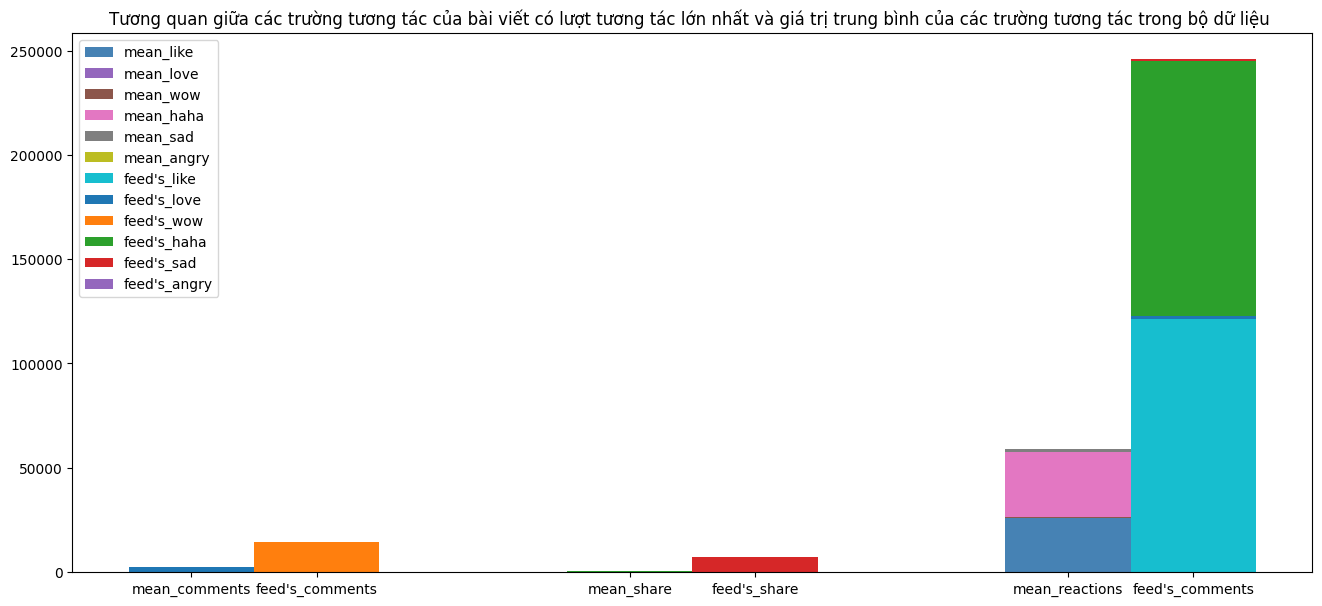

In [190]:
fig__1, ax__1 = plt.subplots()
x = [0.6,1,2,2.4,3.4,3.8]
width__ = 0.4
mean_total = [mean_comments, mean_share, mean_like, mean_love,  mean_wow , mean_haha, mean_sad, mean_angry]
this_feed = [feed_max_reactions['total_comments'],feed_max_reactions['total_share'], feed_max_reactions['reactions_like'] , feed_max_reactions['reactions_love'],
 feed_max_reactions['reactions_wow'],feed_max_reactions['reactions_haha'],feed_max_reactions['reactions_sad'],feed_max_reactions['reactions_angry']]
ax__1.bar(x = 0.6 ,height = mean_comments ,width=width__)
ax__1.bar(x = 1, height=feed_max_reactions['total_comments'],width=width__)
ax__1.bar(x = 2,height= mean_share , width = width__)
ax__1.bar(x = 2.4,height= feed_max_reactions['total_share'],width=width__)
ax__1.bar(x = 3.4, height= mean_like, width=width__, label = 'mean_like', color = 'steelblue')
ax__1.bar(x = 3.4, height= mean_love, width=width__ , bottom= mean_like, label = 'mean_love')
ax__1.bar(x = 3.4, height= mean_wow, width=width__ , bottom= mean_like + mean_love, label = 'mean_wow')
ax__1.bar(x = 3.4, height= mean_haha, width=width__ , bottom= mean_like + mean_love + mean_wow, label = 'mean_haha')
ax__1.bar(x = 3.4, height= mean_sad, width=width__ , bottom= mean_like + mean_love + mean_wow + mean_haha, label= 'mean_sad')
ax__1.bar(x = 3.4, height= mean_angry, width=width__ , bottom= mean_like + mean_love + mean_wow + mean_haha + mean_sad, label = 'mean_angry')
ax__1.bar(x = 3.8, height= feed_max_reactions['reactions_like'], width=width__, label = "feed's_like")
ax__1.bar(x = 3.8, height= feed_max_reactions['reactions_love'], width=width__ , bottom= feed_max_reactions['reactions_like'], label = "feed's_love")
ax__1.bar(x = 3.8, height= feed_max_reactions['reactions_wow'], width=width__ , bottom= feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'], label = "feed's_wow")
ax__1.bar(x = 3.8, height= feed_max_reactions['reactions_haha'], width=width__ , bottom= feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'] + feed_max_reactions['reactions_wow'], label = "feed's_haha")
ax__1.bar(x = 3.8, height= feed_max_reactions['reactions_sad'], width=width__ , bottom= feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'] + feed_max_reactions['reactions_wow'] + feed_max_reactions['reactions_haha'], label = "feed's_sad")
ax__1.bar(x = 3.8, height= feed_max_reactions['reactions_angry'], width=width__ , bottom= feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'] + feed_max_reactions['reactions_wow'] + feed_max_reactions['reactions_haha'] + feed_max_reactions['reactions_sad'], label = "feed's_angry")
fig__1.set_figwidth(16)
fig__1.set_figheight(7)
ax__1.set_title('T∆∞∆°ng quan gi·ªØa c√°c tr∆∞·ªùng t∆∞∆°ng t√°c c·ªßa b√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c l·ªõn nh·∫•t v√† gi√° tr·ªã trung b√¨nh c·ªßa c√°c tr∆∞·ªùng t∆∞∆°ng t√°c trong b·ªô d·ªØ li·ªáu ')
ax__1.set_xticks(x,['mean_comments', "feed's_comments",'mean_share',"feed's_share",'mean_reactions',"feed's_comments"])
ax__1.legend()

- T·ª´ bi·ªÉu ƒë·ªì ta th·∫•y s·ªë l∆∞·ª£ng comments, share, like, haha v∆∞·ª£t tr·ªôi so v·ªõi trung b√¨nh c√°c tr∆∞·ªùng t∆∞∆°ng t√°c trong c√°c b√†i vi·∫øt trong b·ªô d·ªØ li·ªáu, v·ªõi l∆∞·ª£ng t∆∞∆°ng t√°c haha g·∫•p nhi·ªÅu l·∫ßn so v·ªõi trung b√¨nh th√¨ ƒë√¢y l√† b√†i vi·∫øt mang t√≠nh h√†i h∆∞·ªõc, gi·∫£i tr√≠ r·∫•t cao, n√¥i dung ph√π h·ª£p v·ªõi cu·ªôc s·ªëng, v·ªõi xu h∆∞·ªõng hi·ªán t·∫°i

- Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán chi ti·∫øt t·ªïng s·ªë reactions, chi ti·∫øt reactions, t·ªïng s·ªë comments, share c·ªßa b√†i vi·∫øt n√†y

Text(0.5, 1.0, 'Chi ti·∫øt v·ªÅ t∆∞∆°ng t√°c c·ªßa b√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c nhi·ªÅu nh·∫•t trong b·ªô d·ªØ li·ªáu')

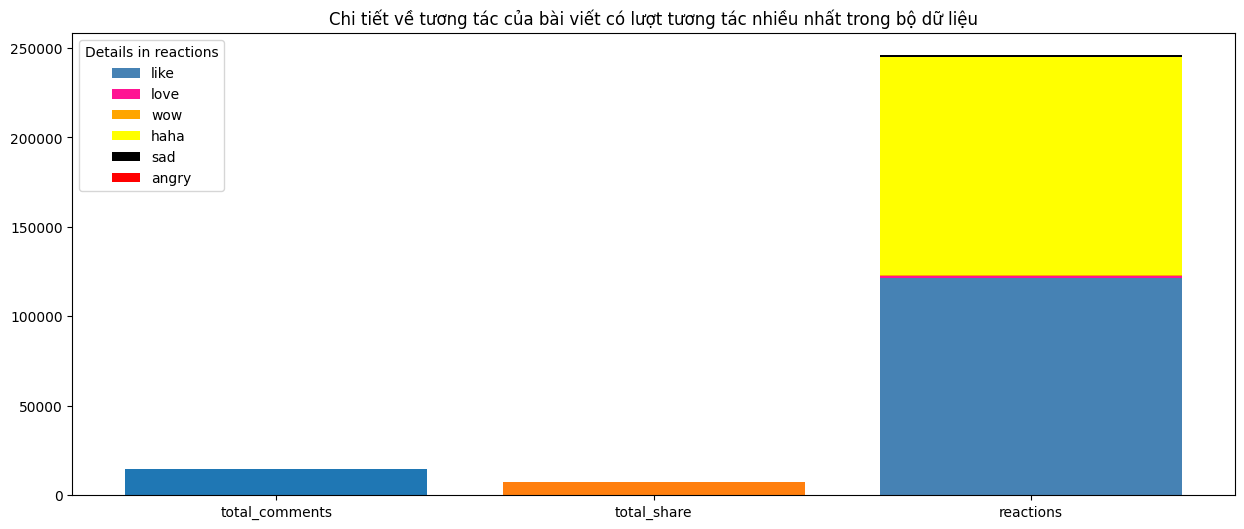

In [60]:
fig_fmax, ax_fmax = plt.subplots(1,1)
ax_fmax.bar(x= 'total_comments',height=feed_max_reactions['total_comments'])
ax_fmax.bar(x= 'total_share', height=feed_max_reactions['total_share'])
ax_fmax.bar(x = 'reactions',height=feed_max_reactions['reactions_like'] ,color = 'steelblue',label = 'like')
ax_fmax.bar(x = 'reactions',height=feed_max_reactions['reactions_love'] , bottom=feed_max_reactions['reactions_like'],color = 'deeppink',label = 'love')
ax_fmax.bar(x = 'reactions',height=feed_max_reactions['reactions_wow'] , bottom=feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'],color = 'orange',label = 'wow')
ax_fmax.bar(x = 'reactions',height=feed_max_reactions['reactions_haha'] , bottom=feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'] + feed_max_reactions['reactions_wow'],color = 'yellow', label = 'haha')
ax_fmax.bar(x = 'reactions',height=feed_max_reactions['reactions_sad'] , bottom=feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'] + feed_max_reactions['reactions_wow'] + feed_max_reactions['reactions_haha'],color = 'black',label = 'sad')
ax_fmax.bar(x = 'reactions',height=feed_max_reactions['reactions_angry'] , bottom=feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'] + feed_max_reactions['reactions_wow'] + feed_max_reactions['reactions_haha'] + feed_max_reactions['reactions_sad'],color = 'r',label = 'angry')
ax_fmax.legend().set_title('Details in reactions')
fig_fmax.set_figwidth(15)
fig_fmax.set_figheight(6)
ax_fmax.set_title('Chi ti·∫øt v·ªÅ t∆∞∆°ng t√°c c·ªßa b√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c nhi·ªÅu nh·∫•t trong b·ªô d·ªØ li·ªáu')

## Th·ªùi gian ƒëƒÉng b√†i c·ªßa c√°c b√†i vi·∫øt

In [9]:
# th·ªùi ƒëi·ªÉm trong ng√†y ƒë∆∞·ª£c ƒëƒÉng b√†i nhi·ªÅu nh·∫•t trong 500 b√†i vi·∫øt g·∫ßn ƒë√¢y
print("th·ªùi ƒëi·ªÉm ƒë∆∞·ª£c ƒëƒÉng b√†i nhi·ªÅu nh·∫•t trong ng√†y c·ªßa 500 b√†i vi·∫øt g·∫ßn ƒë√¢y : %sh" % df['hours_time_created'].mode().iloc[0], sep = ' ')

th·ªùi ƒëi·ªÉm ƒë∆∞·ª£c ƒëƒÉng b√†i nhi·ªÅu nh·∫•t trong ng√†y c·ªßa 500 b√†i vi·∫øt g·∫ßn ƒë√¢y : 7h


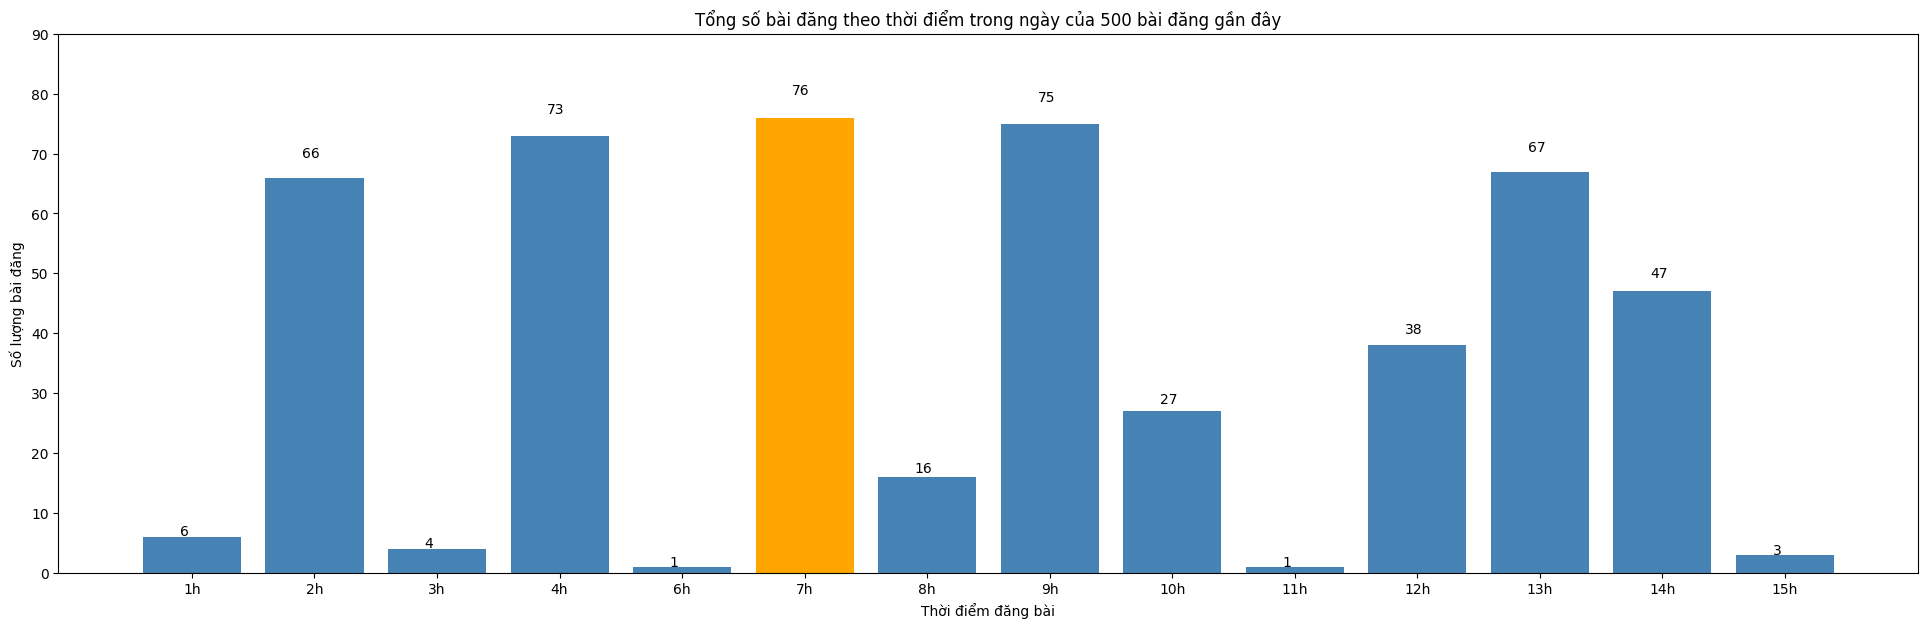

In [10]:
#l∆∞·ª£c ƒë·ªì tr·ª±c quan:
fig_created, ax_created = plt.subplots(1,1)
list_hours_created = list(df['hours_time_created'].value_counts().sort_index().index)
x = [(str(i) + 'h') for i in list_hours_created]
ind_cr = df['hours_time_created'].value_counts().head(1).index[0]
colorr = []
for i in list_hours_created:
    if i == ind_cr:
        colorr.append('orange')
    else:
        colorr.append('steelblue')    
ax_created.bar(x, df['hours_time_created'].value_counts().sort_index().values, color= colorr )
fig_created.set_figheight(7)
fig_created.set_figwidth(24)
ax_created.set_title('T·ªïng s·ªë b√†i ƒëƒÉng theo th·ªùi ƒëi·ªÉm trong ng√†y c·ªßa 500 b√†i ƒëƒÉng g·∫ßn ƒë√¢y')
ax_created.set_ylim(0,90)
ax_created.set_ylabel("S·ªë l∆∞·ª£ng b√†i ƒëƒÉng")
ax_created.set_xlabel("Th·ªùi ƒëi·ªÉm ƒëƒÉng b√†i")
for p in ax_created.patches:
    ax_created.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.05))

t·ª´ bi·ªÉu ƒë·ªì tr√™n ta th·∫•y ƒë∆∞·ª£c th·ªùi ƒëi·ªÉm ƒëƒÉng b√†i vi·∫øt c·ªßa page n√†y kh√¥ng c·ªë ƒë·ªãnh v√† n·∫±m r·∫£i r√°c trong kho·∫£ng t·ª´ 1 gi·ªù ƒë√™m ƒë·∫øn 3 gi·ªù chi·ªÅu, nh∆∞ng t·ª´ 3 gi·ªù chi·ªÅu tr·ªü ƒëi l·∫°i kh√¥ng c√≥ b√†i vi·∫øt n√†o ƒë∆∞·ª£c ƒëƒÉng , t·ª´ 3 gi·ªù chi·ªÅu ƒë·∫øn 12 gi·ªù ƒë√™m l√† 9 ti·∫øng, n√™n t·ª´ 1h ƒë·∫øn 3h th√¨ c√°c admin c·ªßa page ho·∫°t ƒë·ªông c√≤n 9 ti·∫øng c√≤n l·∫°i kh√¥ng ho·∫°t ƒë·ªông
$\rightarrow$ page n√†y ch·ªâ c√≥ 1 admin

## Xu h∆∞·ªõng comment v√†o th·ªùi ƒëi·ªÉm c·ª• th·ªÉ trong ng√†y c·ªßa user 

In [11]:
#t·∫°o data ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì
#
data_comments = []
with open('raw_comments.json', 'r') as handler:
    data_comments = json.load(handler)
data_comments[0][0]['time_created']
#cho v√†o list_time_comments_Created
list_time_comments_created = []
for i in data_comments:
    for j in i:
        list_time_comments_created.append(j['time_created'])
list_time_comments_created.sort(reverse=True)        

Text(0, 0.5, 't·ªïng s·ªë l∆∞·ª£ng comments')

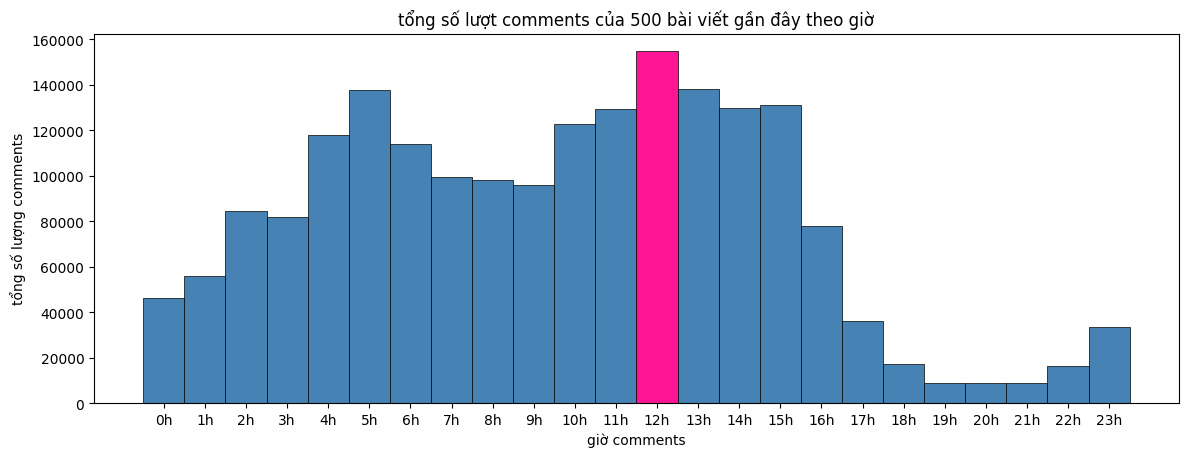

In [12]:
#bi·ªÉu ƒë·ªì tr·ª±c quan
series_time_comments = pd.Series(list_time_comments_created)
max_comment = series_time_comments.value_counts().sort_index().max()
fig_time_comments ,ax_time_comments = plt.subplots(1,1)
y = [(str(i)+'h')for i in range (0,24)]
color_comment = []   
for i in range(24):
    if series_time_comments.value_counts().sort_index().values[i] == max_comment:
        color_comment.append('deeppink')
    else:
        color_comment.append('steelblue')           
ax_time_comments.bar(y, series_time_comments.value_counts().sort_index().values ,width=1, edgecolor="black", linewidth=0.5,color = color_comment)
fig_time_comments
fig_time_comments.set_figwidth(14)
ax_time_comments.set_title('t·ªïng s·ªë l∆∞·ª£t comments c·ªßa 500 b√†i vi·∫øt g·∫ßn ƒë√¢y theo gi·ªù')
ax_time_comments.set_xlabel('gi·ªù comments')
ax_time_comments.set_ylabel('t·ªïng s·ªë l∆∞·ª£ng comments')

$\rightarrow$ th·ªùi gian m√† c√°c user truy c·∫≠p v√†o page , xem page tr√™n facebook nhi·ªÅu nh·∫•t l√† th·ªùi gian ngh·ªâ tr∆∞a(kho·∫£ng t·ª´ 11h tr∆∞a ƒë·∫øn 2h chi·ªÅu) v√† th·ªùi gian l√∫c s√°ng s·ªõm(4h s√°ng ƒë·∫øn 6h s√°ng) v·ªõi t·∫ßn su·∫•t comment kho·∫£ng 250 ng∆∞·ªùi comment 1 gi·ªù

In [13]:
#th·ªùi ƒëi·ªÉm c√≥ s·ªë l∆∞·ª£t  comment nhi·ªÅu nh·∫•t trong ng√†y:
print("th·ªùi ƒëi·ªÉm c√≥ s·ªë l∆∞·ª£t comments nhi·ªÅu nh·∫•t trong ng√†y(theo b·ªô d·ªØ li·ªáu): %sh, v·ªõi t·ªïng s·ªë l∆∞·ª£t comments : %s"%(series_time_comments.value_counts().head(1).index[0],
                                                                                                              series_time_comments.value_counts().head(1).values[0]))

th·ªùi ƒëi·ªÉm c√≥ s·ªë l∆∞·ª£t comments nhi·ªÅu nh·∫•t trong ng√†y(theo b·ªô d·ªØ li·ªáu): 12h, v·ªõi t·ªïng s·ªë l∆∞·ª£t comments : 154829


## s·ª± thay ƒë·ªïi c·ªßa c√°c reactions, comments c·ªßa c√°c b√†i vi·∫øt

- S·ª± t∆∞∆°ng t√°c trong c√°c b√†i vi·∫øt

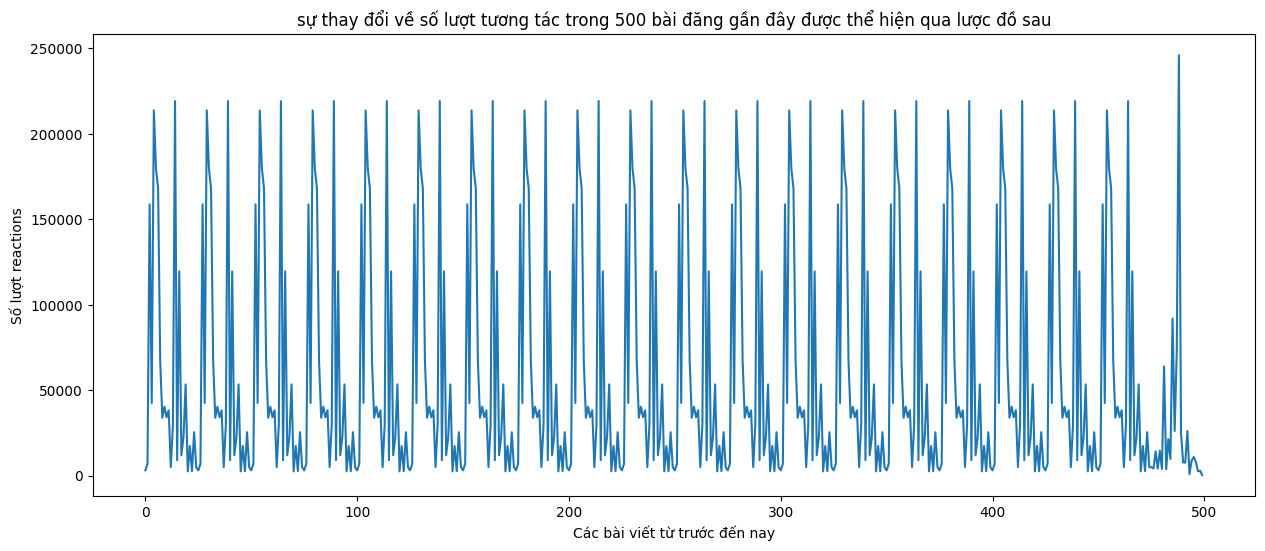

In [14]:
#s·ª± they ƒë·ªïi v·ªÅ s·ªë l∆∞·ª£t t∆∞∆°ng t√°c trong 500 b√†i ƒëƒÉng g·∫ßn ƒë√¢y ƒë∆∞·ª£c th·ªÉ hi·ªán qua l∆∞·ª£c ƒë·ªì sau
fig, ax = plt.subplots(1,1)
plot_reactions = pd.DataFrame(df['total_of_reactions'])
plot_reactions_index = plot_reactions.index
plot_reactions = plot_reactions.iloc[::-1]
plot_reactions.index = plot_reactions_index
ax.plot(plot_reactions)
ax.set_title('s·ª± thay ƒë·ªïi v·ªÅ s·ªë l∆∞·ª£t t∆∞∆°ng t√°c trong 500 b√†i ƒëƒÉng g·∫ßn ƒë√¢y ƒë∆∞·ª£c th·ªÉ hi·ªán qua l∆∞·ª£c ƒë·ªì sau')
ax.set_ylabel('S·ªë l∆∞·ª£t reactions')
ax.set_xlabel('C√°c b√†i vi·∫øt t·ª´ tr∆∞·ªõc ƒë·∫øn nay')
fig.set_figheight(6)
fig.set_figwidth(15)
#trong l∆∞·ª£c ƒë·ªì d∆∞·ªõi ƒë√¢y, c√°c b√†i vi·∫øt theo th·ª© t·ª± t·ª´ xa nh·∫•t ƒë·∫øn g·∫ßn nh·∫•t(t·ª´ tr√°i sang ph·∫£i)

d·ª±a theo bi·ªÉu ƒë·ªì tr√™n ta th·∫•y s·ªë l∆∞·ª£ng reaction c·ªßa page n√†y c√≥ v·∫ª nh∆∞ l√† theo chu k·ª≥ tƒÉng gi·∫£m r·∫•t r√µ r·ªát , kh√¥ng theo xu h∆∞·ªõng tƒÉng d·∫ßn hay gi·∫£m d·∫ßn hay quanh m·ªôt l∆∞·ª£ng reaction nh·∫•t ƒë·ªãnh $\rightarrow$ page n√†y c√≥ s·ª≠ d·ª•ng buff reactions

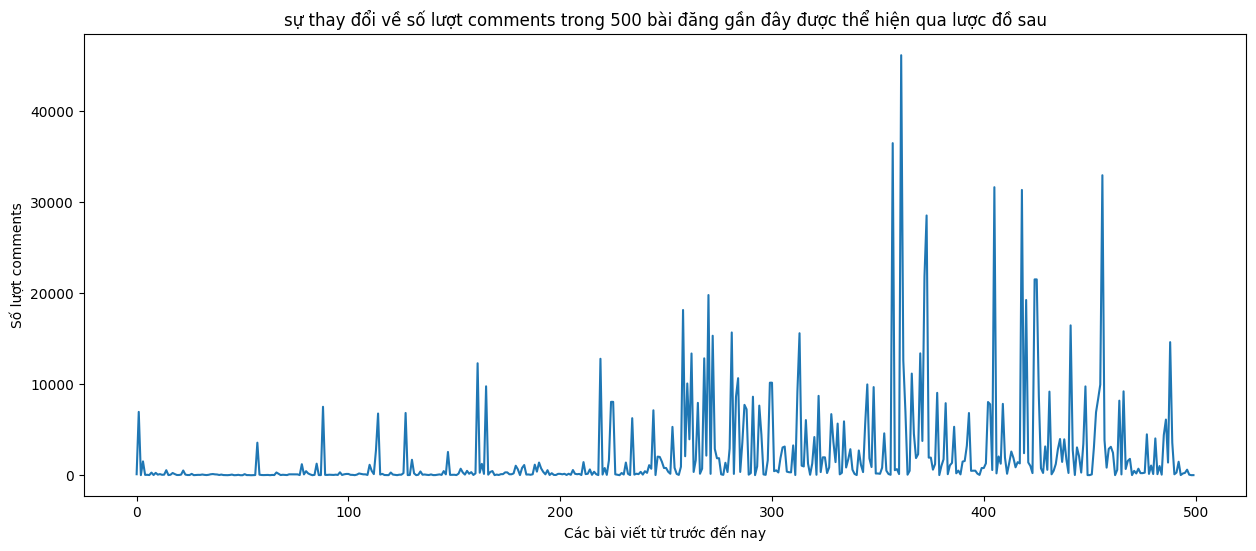

In [15]:
#s·ª± thay ƒë·ªïi v·ªÅ s·ªë l∆∞·ª£t comments c·ªßa 500 b√†i ƒëƒÉng g·∫ßn ƒë√¢y:
fig_cm, ax_cm = plt.subplots(1,1)
plot_reactions_cm = pd.DataFrame(df['total_comments'])
plot_reactions_cm_index = plot_reactions_cm.index
plot_reactions_cm = plot_reactions_cm.iloc[::-1]
plot_reactions_cm.index = plot_reactions_cm_index
ax_cm.plot(plot_reactions_cm)
ax_cm.set_title('s·ª± thay ƒë·ªïi v·ªÅ s·ªë l∆∞·ª£t comments trong 500 b√†i ƒëƒÉng g·∫ßn ƒë√¢y ƒë∆∞·ª£c th·ªÉ hi·ªán qua l∆∞·ª£c ƒë·ªì sau')
ax_cm.set_ylabel('S·ªë l∆∞·ª£t comments')
ax_cm.set_xlabel('C√°c b√†i vi·∫øt t·ª´ tr∆∞·ªõc ƒë·∫øn nay')
fig_cm.set_figheight(6)
fig_cm.set_figwidth(15)

kh√¥ng nh∆∞ l∆∞·ª£ng reactions ƒë∆∞·ª£c buff nh∆∞ ·ªü shell tr∆∞·ªõc ƒë√≥,  l∆∞·ª£ng comment c·ªßa c√°c b√†i vi·∫øt trong b·ªô d·ªØ li·ªáu tr√¥ng r·∫•t ng·∫´u nhi√™n $\rightarrow$ page n√†y kh√¥ng s·ª≠ d·ª•ng buff comment (ho·∫∑c d√πng r·∫•t √≠t)

- reactions, comments v√† share

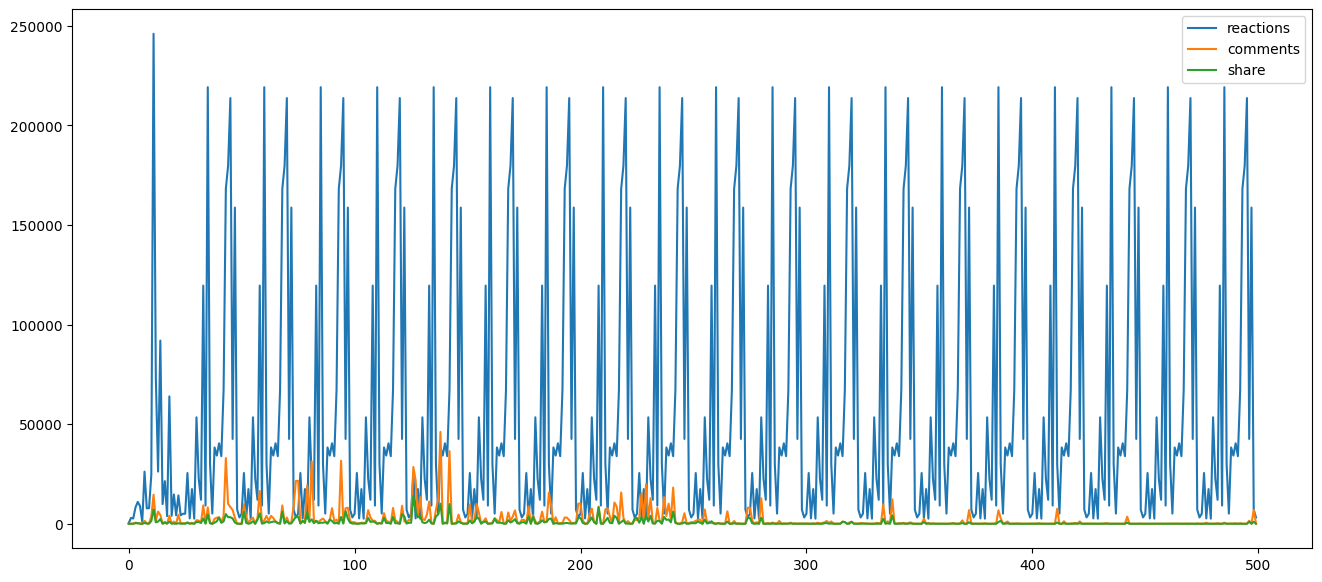

In [20]:
fig_3, ax_3 = plt.subplots(1,1)
ax_3.plot(df['total_of_reactions'],label = 'reactions')
ax_3.plot(df['total_comments'], label = 'comments')
ax_3.plot(df['total_share'],label = 'share')
ax_3.legend()
fig_3.set_figwidth(16)
fig_3.set_figheight(7)

## T·∫ßn su·∫•t xu·∫•t hi·ªán c√°c t·ª´ kh√≥a v√† c√°c hastag 

- T·∫ßn su·∫•t c√°c t·ª´ kh√≥a xu·∫•t hi·ªán trong c√°c b√†i ƒëƒÉng

In [16]:
# n·∫øu s·ª≠ d·ª•ng python 3.12 th√¨ kh√¥ng d√πng ƒëc th∆∞ vi·ªán wordcloud n√™n ph·∫£i d√πng c√°ch n√†y
# #c√°c t·ª´ kh√≥a xu·∫•t hi·ªán nhi·ªÅu nh·∫•t trong c√°c b√†i ƒëƒÉng
# list_keyword_and_frequency = Counter(" ".join(df['message_post']).split()).most_common(5) #l·∫•y 5 t·ª´
# index_lkaf = []
# value_lkaf = []
# for i in list_keyword_and_frequency:
#     index_lkaf.append(i[0])
#     value_lkaf.append(i[1])
# visualization_list_keyword_and_frequency = pd.Series(value_lkaf, index=index_lkaf)
# #l∆∞·ª£c ƒë·ªì tr·ª±c quan
# fig, ax = plt.subplots(1,1)
# ax.pie(visualization_list_keyword_and_frequency,shadow=True, labels=visualization_list_keyword_and_frequency.index, startangle=90, explode=(0.05,0,0,0,0),autopct='%.2f')
# ax.legend(title = '5 t·ª´ kh√≥a xu·∫•t hi·ªán nhi·ªÅu nh·∫•t',loc=2,prop={'size':7})
# fig.set_figheight(20)#checkpoint

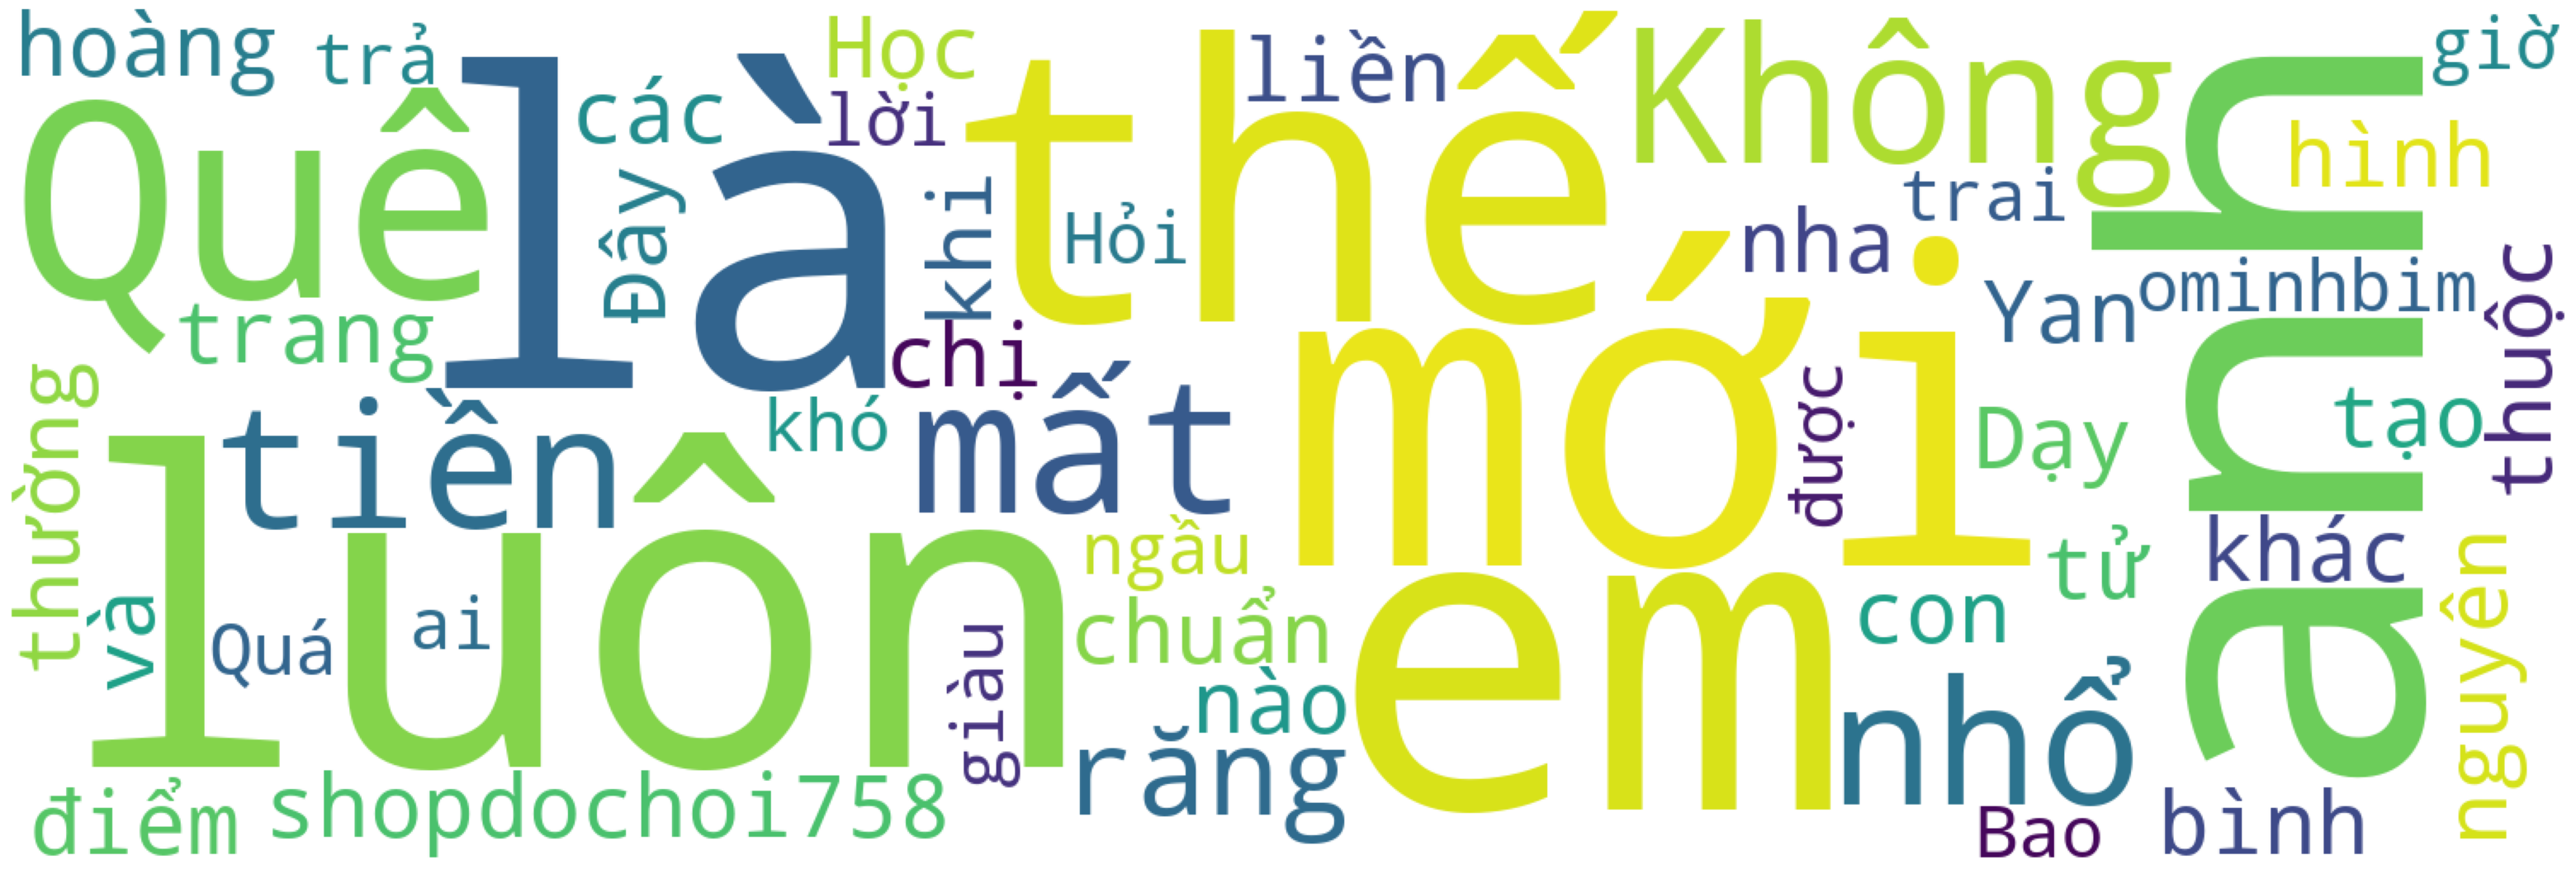

In [17]:
#c√°c t·ª´ kh√≥a xu·∫•t hi·ªán nhi·ªÅu nh·∫•t trong c√°c b√†i ƒëƒÉng (s·ª≠ d·ª•ng cho python 3.11 tr·ªü v·ªÅ tr∆∞·ªõc)
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=50,
                      width=1500, height=500
                         ).generate(str(df['message_post']))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



- T·∫ßn su·∫•t hastag xu·∫•t hi·ªán trong c√°c b√†i ƒëƒÉng

22


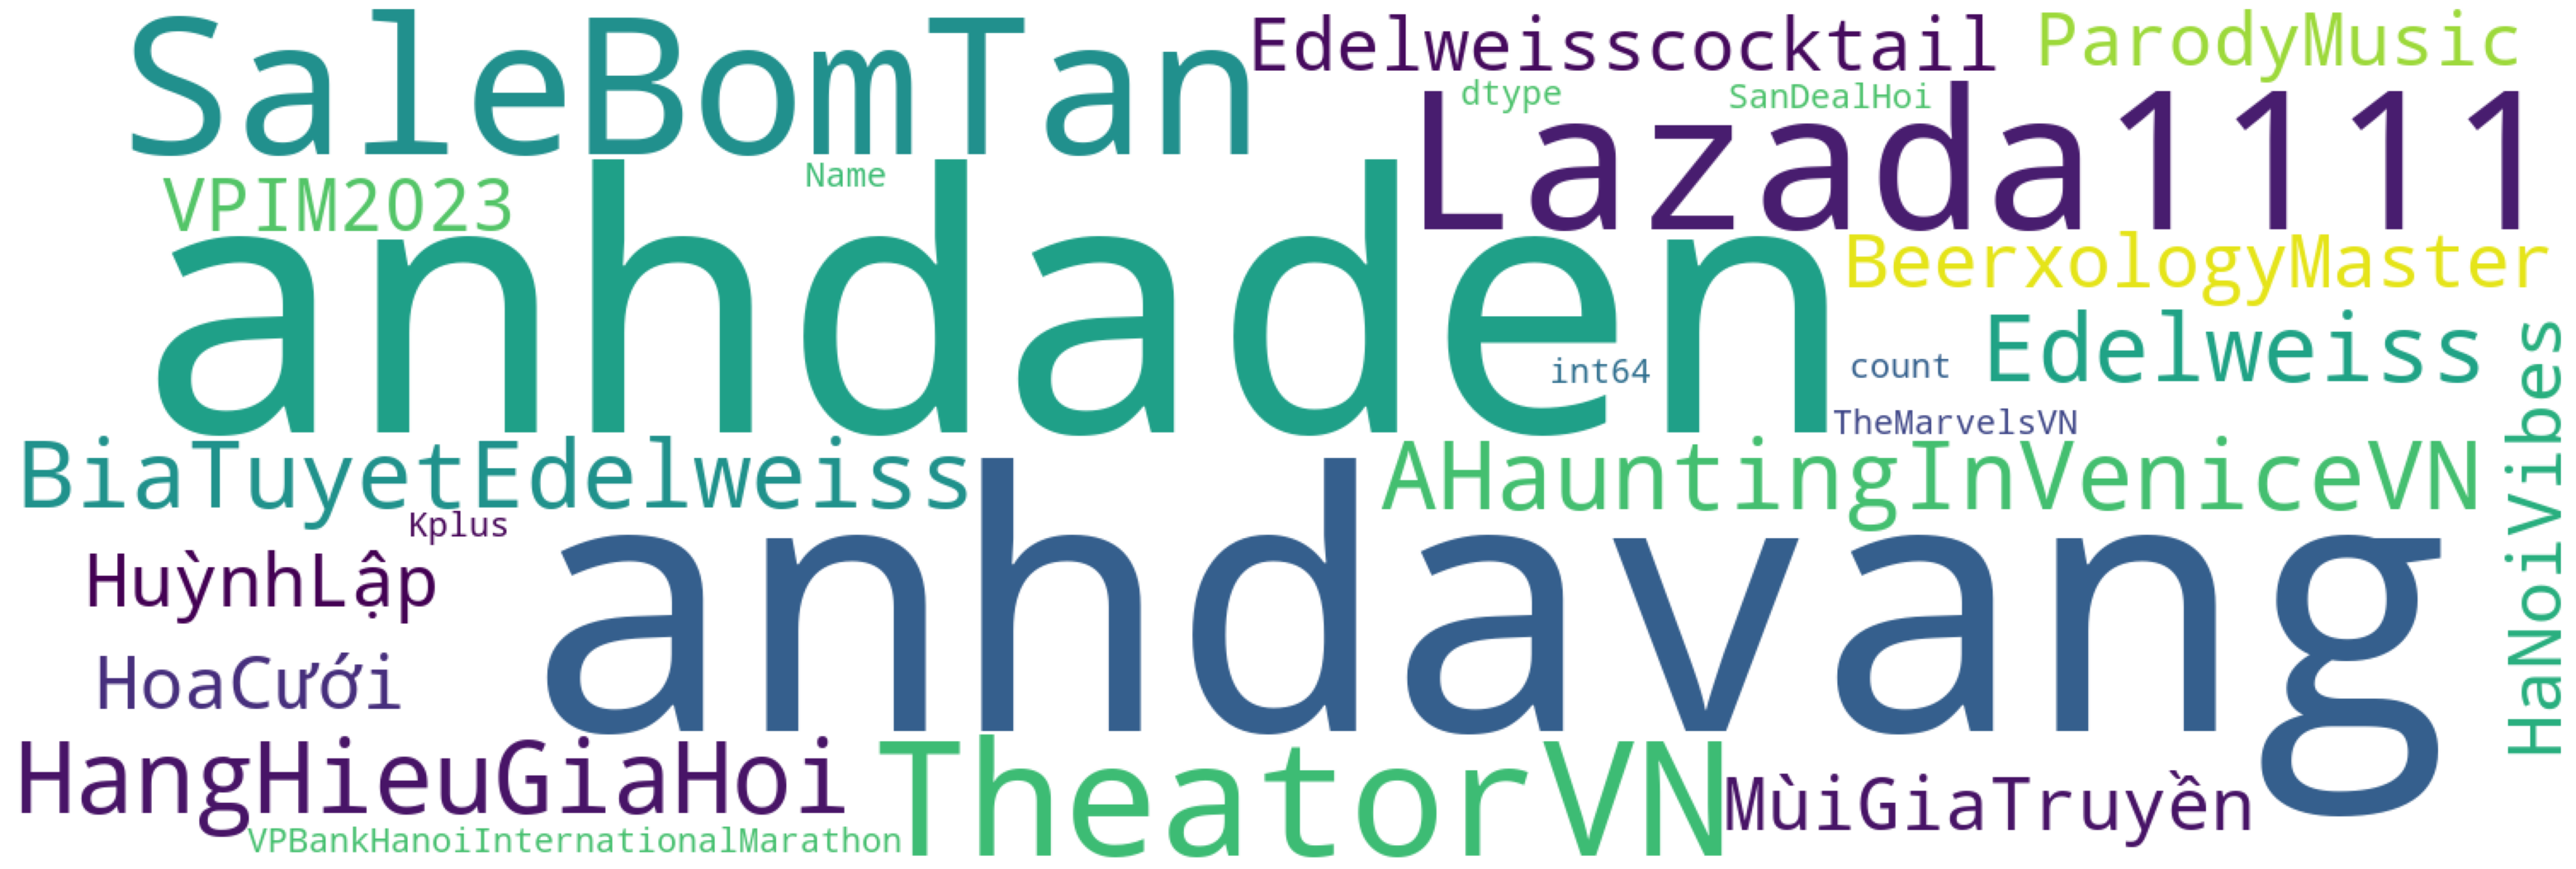

In [18]:
#t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa c√°c hastag
list_hastag = []
with open('file_hastag.txt','r',encoding='utf8') as handler:
     list_hastag = handler.readlines()
for i in range(len(list_hastag)):
    list_hastag[i] = list_hastag[i].replace("\n",'')
series_hastag = pd.Series(list_hastag)  
print(series_hastag.value_counts().shape[0])
  # => page c√≥ √≠t s·ªë l∆∞·ª£ng c√°c hastag kh√°c nhau
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=1000,
                      width=1500, height=500
                         ).generate(str(series_hastag.value_counts()))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

  

s·ªë l∆∞·ª£ng hastag kh√¥ng nhi·ªÅu ch·ªâ c√≥ 22 hastag $\rightarrow$ vi·ªác qu·∫£ng c√°o ·ªü page n√†y ƒëang c√≤n h·∫°n ch·∫ø

## T∆∞∆°ng quan gi·ªØa c√°c lo·∫°i reactions v·ªõi nhau v√† v·ªõi comments

- T∆∞∆°ng quan gi·ªØa 2 lo·∫°i reactions like v√† angry

Text(0.5, 0, 'C√°c b√†i vi·∫øt')

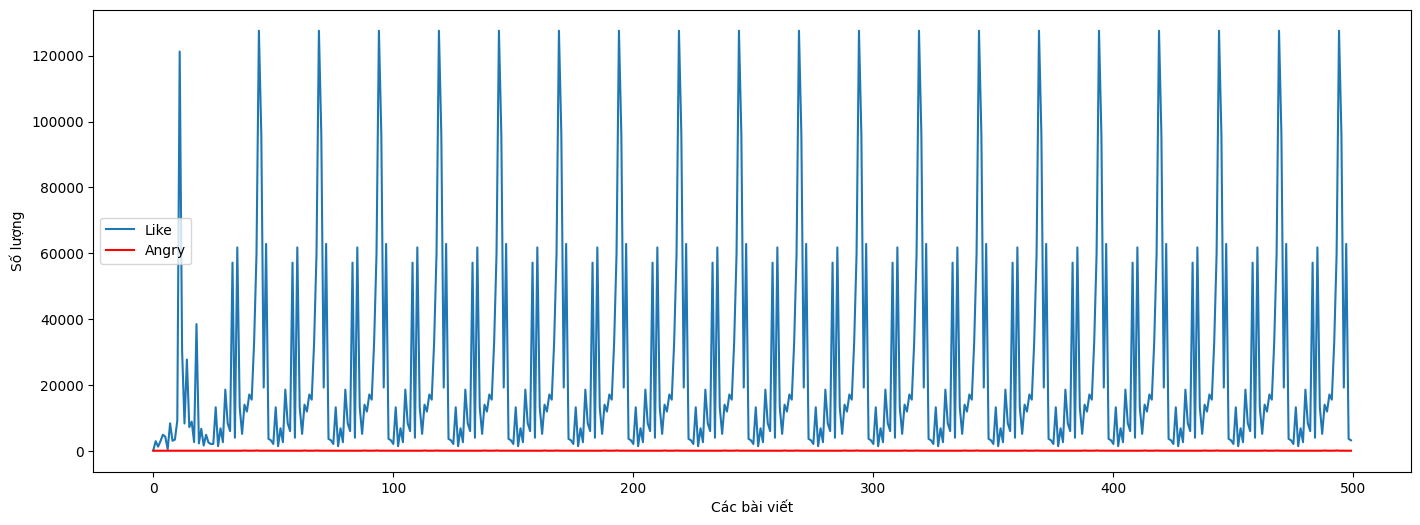

In [19]:

fig_six_at ,axis_six_at = plt.subplots(1,1)
axis_six_at.plot( df['reactions_like'],label='Like')
axis_six_at.plot(df['reactions_angry'],label='Angry',color='r')
axis_six_at.legend()
fig_six_at.set_figwidth(17)
fig_six_at.set_figheight(6)
axis_six_at.set_ylabel('S·ªë l∆∞·ª£ng')
axis_six_at.set_xlabel('C√°c b√†i vi·∫øt')

s·ªë l∆∞·ª£ng Like √°p ƒë·∫£o r·∫•t nhi·ªÅu l·∫ßn so v·ªõi s·ªë l∆∞·ª£ng angry theo nh∆∞ ƒë·ªì th·ªã th√¨ s·ªë angry loanh quanh ·ªü m·ª©c 0 $\rightarrow$ ƒë√¢y l√† 1 page kh√¥ng g√¢y war, kh√¥ng ti√™u c·ª±c

- T∆∞∆°ng quan gi·ªØa 2 lo·∫°i reactions haha v√† like

Text(0.5, 0, 'C√°c b√†i vi·∫øt')

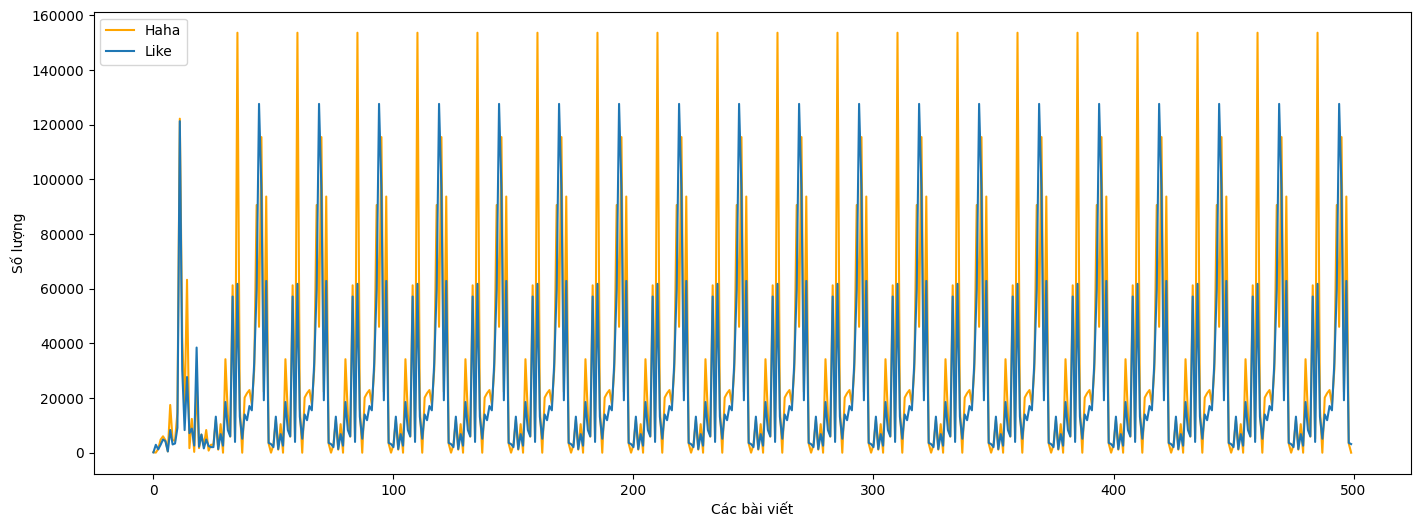

In [20]:

fig_six_at_1 ,axis_six_at_1 = plt.subplots(1,1)
axis_six_at_1.plot( df['reactions_haha'],label='Haha',color='orange')
axis_six_at_1.plot(df['reactions_like'],label='Like')
axis_six_at_1.legend()
fig_six_at_1.set_figwidth(17)
fig_six_at_1.set_figheight(6)
axis_six_at_1.set_ylabel('S·ªë l∆∞·ª£ng')
axis_six_at_1.set_xlabel('C√°c b√†i vi·∫øt')

s·ªë l∆∞·ª£ng haha c√≤n nhi·ªÅu h∆°n c·∫£ s·ªë l∆∞·ª£ng like $\rightarrow$ th∆∞·ªùng th√¨ ng∆∞·ªùi xem s·∫Ω ·∫•n like r·ªìi b·ªè qua, nh∆∞ng l∆∞·ª£ng haha c√≤n v∆∞·ª£t tr·ªôi h∆°n c·∫£ like n√™n b√†i vi·∫øt c·ªßa page c√≥ t√≠nh gi·∫£i tr√≠ kh√° cao

- T∆∞∆°ng quan gi·ªØa 2 lo·∫°i reactions haha v√† love

Text(0.5, 0, 'C√°c b√†i vi·∫øt')

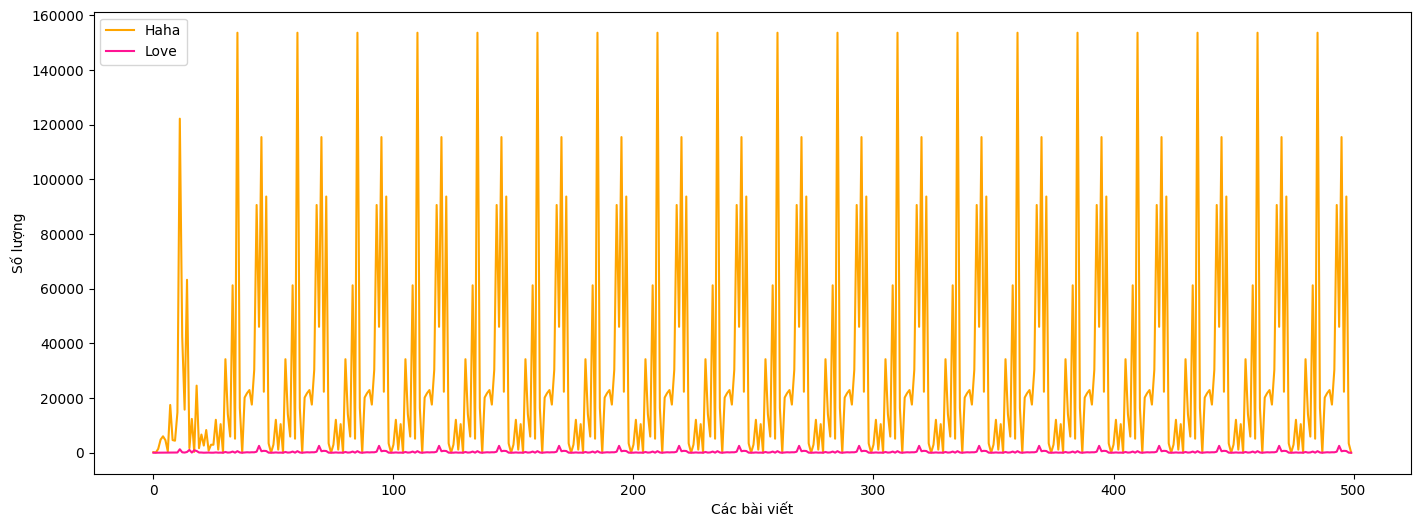

In [21]:

fig_six_at_2 ,axis_six_at_2 = plt.subplots(1,1)
axis_six_at_2.plot( df['reactions_haha'],label='Haha',color='orange')
axis_six_at_2.plot(df['reactions_love'],label='Love',color='deeppink')
axis_six_at_2.legend()
fig_six_at_2.set_figwidth(17)
fig_six_at_2.set_figheight(6)
axis_six_at_2.set_ylabel('S·ªë l∆∞·ª£ng')
axis_six_at_2.set_xlabel('C√°c b√†i vi·∫øt')

s·ªë l∆∞·ª£ng c√°c b√†i vi·∫øt c√≥ t√≠nh nh√¢n vƒÉn c·ªßa page h∆°i √≠t(nh√¢n vƒÉn th√¨ ch·∫£ ai ƒëi th·∫£ haha c·∫£)

- T∆∞∆°ng quan gi·ªØa s·ªë l∆∞·ª£ng reactions v√† s·ªë l∆∞·ª£ng comments

Text(0.5, 0, 'C√°c b√†i vi·∫øt')

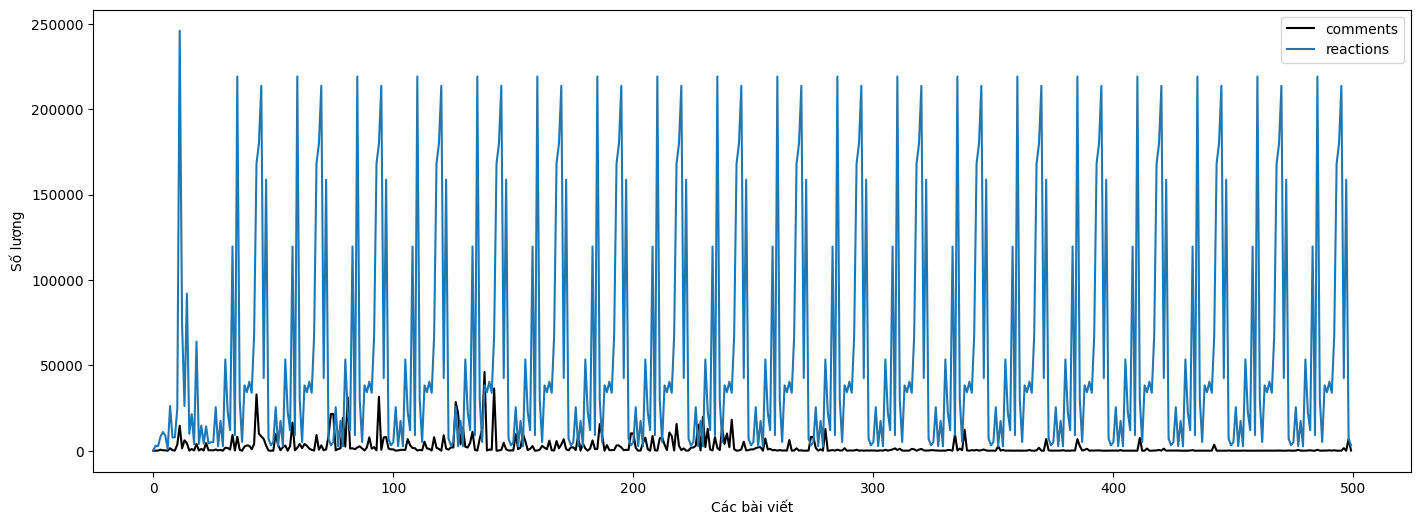

In [22]:

fig_six_at_3 ,axis_six_at_3 = plt.subplots(1,1)
axis_six_at_3.plot( df['total_comments'],label='comments', color = 'black')
axis_six_at_3.plot(df['total_of_reactions'],label='reactions')
axis_six_at_3.legend()
fig_six_at_3.set_figwidth(17)
fig_six_at_3.set_figheight(6)
axis_six_at_3.set_ylabel('S·ªë l∆∞·ª£ng')
axis_six_at_3.set_xlabel('C√°c b√†i vi·∫øt')

- S·ªë l∆∞·ª£t comment trung b√¨nh c·ªßa 1 b√†i vi·∫øt

In [23]:
df['total_comments'].mean()

2301.29

nh∆∞ ƒë√£ bi·∫øt ·ªü tr√™n th√¨ s·ªë l∆∞·ª£ng reaction l√† do buff n√™n kh√¥ng c√≥ g√¨ qu√° ng·∫°c nhi√™n khi s·ªë l∆∞·ª£ng comment k√©m r·∫•t nhi·ªÅu l·∫ßn so v·ªõi s·ªë l∆∞·ª£t reaction nh∆∞ng s·ªë comment trung b√¨nh c·ªßa 1 b√†i vi·∫øt kho·∫£ng 2000 th√¨ ƒë√¢y c≈©ng l√† m·ªôt con s·ªë l·ªõn v·ªÅ b√¨nh lu·∫≠n $\rightarrow$ page n√†y c√≥ s·ªë l∆∞·ª£ng user th·ª±c kh√° l·ªõn

- l∆∞·ª£c ƒë·ªì t∆∞∆°ng quan gi·ªØa t·ª´ng reation v·ªõi nhau

<Axes: >

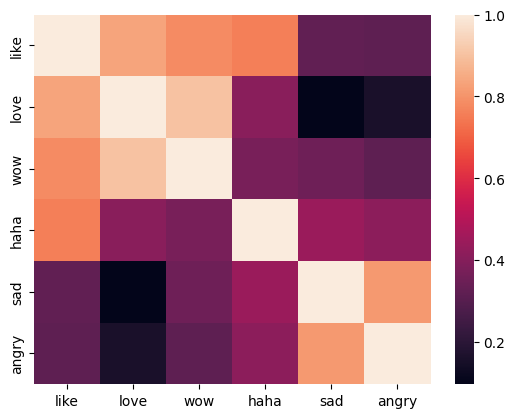

In [24]:
corrleation_df = pd.DataFrame({'like':df['reactions_like'], 'love': df['reactions_love'], 'wow': df['reactions_wow'], 'haha':df['reactions_haha'], 'sad':df['reactions_sad'], 'angry':df['reactions_angry']})
corrleation_plt = corrleation_df.corr()
round(corrleation_plt,2)
sns.heatmap(corrleation_plt)


- l∆∞·ª£c ƒë·ªì t∆∞∆°ng quan gi·ªØa t·ªïng reaction v·ªõi t·ªïng comments

<Axes: >

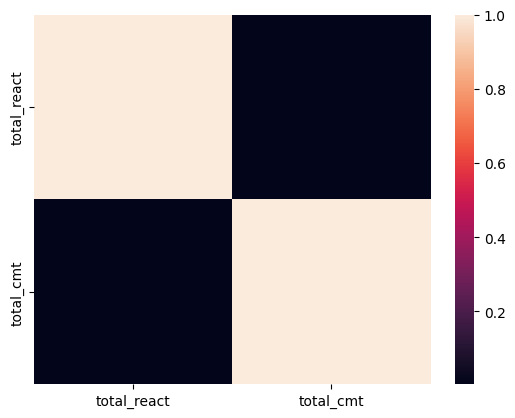

In [25]:
corrleation_dfc = pd.DataFrame({'total_react':df['total_of_reactions'], 'total_cmt':df['total_comments']})
corrleation_pltc = corrleation_dfc.corr()
round(corrleation_pltc,2)
sns.heatmap(corrleation_pltc)

## T∆∞∆°ng quan gi·ªØa c√°c b√†i vi·∫øt c√≥ v√† kh√¥ng c√≥ video

In [26]:
no_video = df[df['len_video'] == '0']['len_video'].count()
video = 500 - no_video
series_video=[]
for i in range(video):
    series_video.append('c√≥ video')
for i in range(no_video):
    series_video.append('kh√¥ng video')   
plt_series = pd.Series(series_video)     

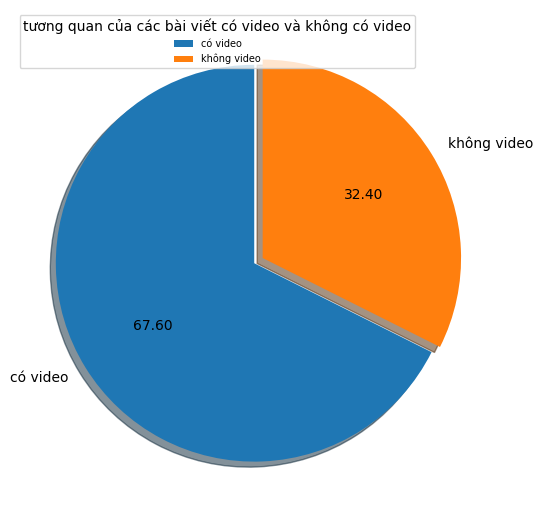

In [27]:
fig_video, ax_video = plt.subplots(1,1)
ax_video.pie(plt_series.value_counts(),shadow=True, labels=plt_series.value_counts().index, startangle=90, explode=(0.05,0),autopct='%.2f')
ax_video.legend(title = 't∆∞∆°ng quan c·ªßa c√°c b√†i vi·∫øt c√≥ video v√† kh√¥ng c√≥ video',loc=2,prop={'size':7})
fig_video.set_figheight(20)#checkpoint

$\rightarrow$ page n√†y s·ª≠ d·ª•ng video ƒë·ªÉ l√†m n·ªôi dung ch·ªß y·∫øu v√† t·∫°o ra s·ª± h√†i h∆∞·ªõc, gi·∫£i tr√≠ t·ª´ vi·ªác edit c√°c video 

## ƒê·ªô d√†i trung b√¨nh c·ªßa video

- H√†m convert th·ªùi gian t·ª´ string v·ªÅ th·ªùi gian theo gi√¢y

In [98]:
def convert_to_time_sec(s):
    result = 0
    list_s = s.split(':')
    list_rev = list_s[::-1]
    try:
        for i in range(len(list_rev)):
            result += int(list_rev[i]) * (60**i)
    except:
        return result        
    return result

- th·ªùi gian trung b√¨nh c·ªßa 1 video trong b√†i vi·∫øt

In [101]:
df['len_video'].apply(convert_to_time_sec).mean()


40.724

# Ph√¢n t√≠ch th√¥ng tin v·ªÅ c√°c user tham gia b√¨nh lu·∫≠n c·ªßa c√°c post 

## L·∫•y d·ªØ li·ªáu v√† ti·ªÅn x·ª≠ l√≠ d·ªØ li·ªáu user

In [28]:
#l·∫•y th√¥ng tin v·ªÅ ng∆∞·ªùi b√¨nh lu·∫≠n ƒë·ªÉ ph√¢n t√≠ch
with open('user_data_js.json', 'r') as handler:
    rea = json.load(handler)
#l·∫•y d·ªØ li·ªáu c·ªßa user cho v√†o dataframe
id = []
first_name  = []
middle_name = []
last_name = []
birthday = []
gender = []
hometown = []
education = []
for i in rea:
    try:
        id.append(i['id'])
    except:
        id.append(np.NAN)    
    try:
        first_name.append(i['first_name'])
    except:
        first_name.append(np.NAN) 
    try:
        birthday.append(i['birthday'])
    except:
        birthday.append(np.NAN)         
    try:
        gender.append(i['gender'])
    except:
        gender.append(np.NAN) 
    try:
        hometown.append(i['hometown']['name'])
    except:
        hometown.append(np.NAN) 
    try:
        education.append(i['education'][0]['type'])
    except:
        education.append(np.NAN)     
    try:
        middle_name.append(i['middle_name'])
    except:
        middle_name.append(np.NAN) 
data_user_old = pd.DataFrame({'id': id, 'first_name':first_name, 'middle_name':middle_name,  'birthday': birthday, 'gender': gender, 'hometown':hometown, 'education':education })        


In [29]:
data_user_old.shape

(21293, 7)

- X·ª≠ l√≠ missing_data cho data_user_old

In [30]:
data_user_old = data_user_old.dropna(how='all') # lo·∫°i b·ªè c√°c b·ªô (c√°c h√†ng to√†n NaN)
data_user_old['education'] = data_user_old['education'].fillna("unknown") # x·ª≠ l√≠ NaN c·ªßa education cho v·ªÅ hide (v√¨ kh√¥ng c√≥ c√°ch ƒë·ªÉ suy lu·∫≠n tr√¨nh ƒë·ªô c·ªßa 1 ng∆∞·ªùi b·∫•t k√¨ ch·ªâ d·ª±a v√†o c√°c th√¥ng tin tr√™n fb ƒë∆∞a ra)
data_user_old['birthday'] = data_user_old['birthday'].fillna("unknown")
data_user_old['hometown'] = data_user_old['hometown'].fillna("unknown")

In [31]:
data_user = data_user_old #l∆∞u √Ω ·ªü ƒë√¢y n√™n t·∫°o 1 dataframe m·ªõi ƒë·ªÉ v·ªÅ sau x·ª≠ l√≠ missing gender t·ªët h∆°n
data_user_old.shape

(21246, 7)

## X·ª≠ l√≠ missing cho c·ªôt 'gender' trong data_user

In [32]:
data_user[pd.isna(data_user['gender'])] 
# c√≥ 202 user l√† kh√¥ng c√≥ gi·ªõi t√≠nh

id first_name middle_name    birthday gender hometown  \
51     100083853807574        Th·ªë         NaN     unknown    NaN  unknown   
63     100084510619977        Ebe         NaN     unknown    NaN  unknown   
95     100051738106961       Tr·∫ßn         NaN     unknown    NaN  unknown   
108    100037069233491       Th√°i         Nam     unknown    NaN  unknown   
404    100094228137143      Trinh         NaN     unknown    NaN  unknown   
...                ...        ...         ...         ...    ...      ...   
20388  100011532728676       Ngan         NaN     unknown    NaN  unknown   
20782  100070166976585     Yen Vy         NaN     unknown    NaN  unknown   
20823  100041066621715      Giang         Th·ªã     unknown    NaN  unknown   
21082  100029270222389       T√¢yy         NaN  06/01/1996    NaN  unknown   
21237  100050907707158      Linhh         NaN     unknown    NaN  Can Tho   

      education  
51      unknown  
63      unknown  
95      unknown  
108     College  
404     unknown  
...         ...  
20388   unknown  
20782   unknown  
20823   unknown  
21082   unknown  
21237   unknown  

[202 rows x 7 columns]

In [33]:
#x·ª≠ l√≠ NaN ·ªü first_name v√† middle_name ƒë·ªÉ d√πng thu·∫≠t to√°n Multinomial Naive Bayes d·ª± ƒëo√°n
data_user['first_name'] = data_user['first_name'].fillna('')
data_user['middle_name'] = data_user['middle_name'].fillna('')
#ch√®n th√™m c·ªôt name t·ª´ c·ªôt first_name v√† middle_name
data_user['name'] = data_user['first_name']+' '+data_user['middle_name']

In [34]:

data_user[(pd.isna(data_user['gender'])) & (pd.notna(data_user['first_name']))] 
# th·∫≠t t√¨nh c·ªù v√† c≈©ng th·∫≠t b·∫•t ng·ªù l√† t·∫•t c·∫£ 202 user kh√¥ng c√≥ gi·ªõi t√≠nh l·∫°i ƒë·ªÅu c√≥ t√™n n√™n d·ª± ki·∫øn s·∫Ω d√πng thu·∫≠t to√°n Multinomial Naive Bayes ƒë·ªÉ d·ª± ƒëo√°n gender c·ªßa user

id first_name middle_name    birthday gender hometown  \
51     100083853807574        Th·ªë                 unknown    NaN  unknown   
63     100084510619977        Ebe                 unknown    NaN  unknown   
95     100051738106961       Tr·∫ßn                 unknown    NaN  unknown   
108    100037069233491       Th√°i         Nam     unknown    NaN  unknown   
404    100094228137143      Trinh                 unknown    NaN  unknown   
...                ...        ...         ...         ...    ...      ...   
20388  100011532728676       Ngan                 unknown    NaN  unknown   
20782  100070166976585     Yen Vy                 unknown    NaN  unknown   
20823  100041066621715      Giang         Th·ªã     unknown    NaN  unknown   
21082  100029270222389       T√¢yy              06/01/1996    NaN  unknown   
21237  100050907707158      Linhh                 unknown    NaN  Can Tho   

      education       name  
51      unknown       Th·ªë   
63      unknown       Ebe   
95      unknown      Tr·∫ßn   
108     College   Th√°i Nam  
404     unknown     Trinh   
...         ...        ...  
20388   unknown      Ngan   
20782   unknown    Yen Vy   
20823   unknown  Giang Th·ªã  
21082   unknown      T√¢yy   
21237   unknown     Linhh   

[202 rows x 8 columns]

In [35]:
#l·∫•y th√¥ng tin v·ªÅ t√™n v√† gi·ªõi t√≠nh c·ªßa user ƒë√£ r√µ gi·ªõi t√≠nh ƒë·ªÉ d√πng cho training v√† test
name_1 = list(data_user[pd.notna(data_user['gender'])]['name'].values) #d·ªØ li·ªáu d√πng ƒë·ªÉ d·ª± ƒëo√°n
gender_ = list(data_user[pd.notna(data_user['gender'])]['gender'].values) #nh√£n c·ªßa d·ªØ li·ªáu
#chuy·ªÉn name_ v·ªÅ d·∫°ng ma tr·∫≠n d·ªçc ƒë·ªÉ th·ª±c hi·ªán ƒë∆∞·ª£c thu·∫≠t to√°n Multinomial Naive Bayes
CoV = CountVectorizer()
name_ = CoV.fit_transform(name_1)

name_train, name_test, gender_train, gender_test = train_test_split(name_, gender_)
Mul = MultinomialNB()
Mul.fit(name_train, gender_train)
Mul.score(name_test, gender_test)#x√°c su·∫•t ƒë√∫ng kho·∫£ng 80%


0.816194639802319

In [36]:
data_user.shape[0]

21246

In [37]:
new_gender = [] # list gender m·ªõi
for i in range (data_user.shape[0]):
    if( pd.isna(data_user.iloc[i]['gender'])):#n·∫øu c·ªôt gender kh√¥ng x√°c ƒë·ªãnh th√¨ s·ª≠ d·ª•ng thu·∫≠t to√°n ƒë·ªÉ d·ª± ƒëo√°n gender (n·∫øu Nan ·ªü c·ªôt name th√¨ s·∫Ω ph·∫£i ƒë·ªÉ c·ªôt gender l√† kh√¥ng x√°c ƒë·ªãnh trong b·ªô d·ªØ li·ªáu n√†y th√¨ ƒëi·ªÅu ƒë√≥ kh√¥ng x·∫£y ra)
        print("%s : %s -> %s"%(data_user.iloc[i]['name'], data_user.iloc[i]['gender'], Mul.predict(CoV.transform([data_user.iloc[i]['name']]).toarray())[0]))
        new_gender.append(Mul.predict(CoV.transform([data_user.iloc[i]['name']]).toarray())[0])
        # data_user.iloc[i]['gender'] = Mul.predict(CoV.transform([data_user.iloc[i]['name']]).toarray())[0]
    else:
        new_gender.append(data_user.iloc[i]['gender']) 
len(new_gender)        

Th·ªë  : nan -> male
Ebe  : nan -> male
Tr·∫ßn  : nan -> male
Th√°i Nam : nan -> male
Trinh  : nan -> female
Trang  : nan -> female
Ming  : nan -> male
BƒÉng  : nan -> female
Quy·ªÅn  : nan -> male
V≈©  : nan -> male
Th√∫y  : nan -> female
Vangg  : nan -> female
H√†  : nan -> female
B√≤  : nan -> male
Chun Anh : nan -> male
Ph∆∞∆°ng  : nan -> female
Lait  : nan -> male
Tr·ª±c  : nan -> male
Gia  : nan -> male
An Ngoc : nan -> female
Thanh  : nan -> male
Ha  : nan -> female
T·ªõi  : nan -> male
Linh  : nan -> female
Ph·∫°m  : nan -> male
Duyen Van : nan -> female
Linh  : nan -> female
Ph∆∞∆°ng  : nan -> female
Ly  : nan -> female
L√¢m Thanh : nan -> male
Ng·ªçc  : nan -> female
Ng  : nan -> male
H·∫≠u  : nan -> male
Bella  : nan -> male
Tu·∫•n Anh : nan -> male
H√πng  : nan -> male
M·ªπ  : nan -> female
ThuyüêΩüí§ Thuy : nan -> female
Ki·ªát  : nan -> male
Th√°i  : nan -> male
Tr√¢m  : nan -> female
Tai  : nan -> male
Thanh Ni√™n  : nan -> male
B·∫£o Duy : nan -> male
Ben  : nan -> ma

21246

In [38]:
#thay ƒë·ªïi c√°c gi√° tr·ªã c·ªßa data_user['gender'] = new_gender
data_user['gender'] = new_gender

In [39]:
#ki·ªÉm tra xem c√≥ b·ªô n√†o c√≤n Nan ·ªü c·ªôt Gender hay kh√¥ng
data_user[pd.isna(data_user['gender'])].shape[0]

0

- T∆∞∆°ng quan v·ªÅ gi·ªõi t√≠nh c·ªßa c√°c user_comment

Text(0, 0.5, 'Quantity')

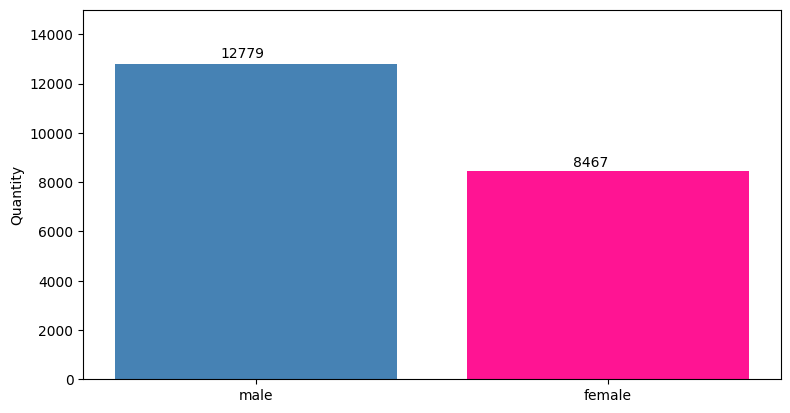

In [41]:
fig_mf, ax_mf = plt.subplots(1,1)
ax_mf.bar(data_user['gender'].value_counts().index, data_user['gender'].value_counts().values, color = ['steelblue','deeppink'])
fig_mf.set_figwidth(9)
ax_mf.set_ylim(0,15000)
for p in ax_mf.patches:
    ax_mf.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.02))
ax_mf.set_ylabel("Quantity")

$\rightarrow$ s·ªë l∆∞·ª£ng nam trong page nhi·ªÅu √°p ƒë·∫£o so v·ªõi s·ªë l∆∞·ª£ng n·ªØ 

- User c√≥ s·ªë l∆∞·ª£t b√¨nh lu·∫≠n l·ªõn nh·∫•t trong b·ªô d·ªØ li·ªáu

In [42]:

list_user_comment = []
with open('file_user_id_comment_list.txt','r') as handler:
    list_user_comment = handler.readlines()
#x·ª≠ l√≠ l√†m s·∫°ch lo·∫°i b·ªè c√°c k√≠ t·ª± "\n" trong list_user_comment
for i in range(len(list_user_comment)):
    list_user_comment[i] = list_user_comment[i][:list_user_comment[i].find("\n")]
#cho v√†o series ƒë·ªÉ t√¨m ra user_id xu·∫•t hi·ªán nhi·ªÅu nh·∫•t  
print(pd.Series(list_user_comment).value_counts().head(1))  
frequency_user = pd.Series(list_user_comment).value_counts().head(1).values[0]
id_most = pd.Series(list_user_comment).value_counts().head(1).index[0]
#data user c√≥ l∆∞·ª£t b√¨nh lu·∫≠n nhi·ªÅu nh·∫•t
data_user[data_user['id'] == id_most]

100058231838069    1136
Name: count, dtype: int64


id first_name middle_name birthday gender hometown  \
17104  100058231838069        Nam              unknown   male   C√† Mau   

         education  name  
17104  High School  Nam

$\rightarrow$ ƒë·∫øn c·∫£ user b√¨nh lu·∫≠n nhi·ªÅu nh·∫•t c≈©ng t√™n l√† Nam v√† gi·ªõi t√≠nh l√† nam

## X·ª≠ l√≠ chu·∫©n h√≥a hometown

In [43]:
old_hometown  = set(data_user['hometown'].values)
new_hometown = []
handle_hometown = []
for i in old_hometown:
    if i != 'unknown':
        try:
            geolocator_ = Nominatim(user_agent="handle_home_town")
            couple = {i:str(geolocator_.geocode(i))}
            if(str(geolocator_.geocode(i)) != 'None'):
                new_hometown.append(couple)
                print(couple)
            else:
                handle_hometown.append(i) 
        except:
            handle_hometown.append(i)
            print("l·ªói n√®")

{'Bu√¥n Ma Thu·ªôt': 'Bu√¥n Ma Thu·ªôt, T·ªânh ƒêƒÉk LƒÉk, 63107, Vi·ªát Nam'}
{'Nghia Hung': 'Huy·ªán Nghƒ©a H∆∞ng, T·ªânh Nam ƒê·ªãnh, 41000, Vi·ªát Nam'}
{'Yen Thuy': 'Y√™n Th·ªßy, T·ªânh H√≤a B√¨nh, Vi·ªát Nam'}
{'My Loc': 'my loc, Cagayan Valley Road, Maguinao, Purok 3, Sampaloc, San Rafael, Bulacan, Central Luzon, 3008, Philippines'}
{'Madrid, Spain': 'Madrid, Comunidad de Madrid, Espa√±a'}
{'Nha Trang': 'Th√†nh ph·ªë Nha Trang, T·ªânh Kh√°nh H√≤a, Vi·ªát Nam'}
{'Dong Giang': 'Ê¶ïÊ±üÂéø, Èªî‰∏úÂçóËãóÊóè‰æóÊóèËá™Ê≤ªÂ∑û, Ë¥µÂ∑ûÁúÅ, ‰∏≠ÂõΩ'}
{'Soc Trang': 'T·ªânh S√≥c TrƒÉng, Vi·ªát Nam'}
{'Dehui': 'Âæ∑ÊÉ†Â∏Ç, ÈïøÊò•Â∏Ç, ÂêâÊûóÁúÅ, 130000, ‰∏≠ÂõΩ'}
{'M·ªè C√†y': 'Th·ªã tr·∫•n M·ªè C√†y, Huy·ªán M·ªè C√†y Nam, T·ªânh B·∫øn Tre, Vi·ªát Nam'}
{'Duc Trach, Ha Son Binh, Vietnam': 'Trung ƒê·ª©c hotel, Qu·ªëc l·ªô 9G, Phong Nha, B·ªë Tr·∫°ch, T·ªânh Qu·∫£ng B√¨nh, 511860, Vi·ªát Nam'}
{'L√†o Cai': 'T·ªânh L√†o Cai, Vi·ªát Nam'}
{'Santiago de Cali': 'Per√≠metro Urbano Santiago de Cali, Cali

- H√†m l·∫•y t√™n t·ªânh (ho·∫∑c th√†nh ph·ªë n·∫øu c√≥) c·ªßa ƒë·ªãa ƒëi·ªÉm

In [44]:
def split_city(s):
    list_s = s.split(",")
    for i in list_s:
        if(i.find("T·ªânh")!=-1 ):
            return(i)
        if(i.find("Th√†nh ph·ªë") != -1):
            return(i)
    return "foreign_country"    

In [45]:
new_hometown

[{'Bu√¥n Ma Thu·ªôt': 'Bu√¥n Ma Thu·ªôt, T·ªânh ƒêƒÉk LƒÉk, 63107, Vi·ªát Nam'},
 {'Nghia Hung': 'Huy·ªán Nghƒ©a H∆∞ng, T·ªânh Nam ƒê·ªãnh, 41000, Vi·ªát Nam'},
 {'Yen Thuy': 'Y√™n Th·ªßy, T·ªânh H√≤a B√¨nh, Vi·ªát Nam'},
 {'My Loc': 'my loc, Cagayan Valley Road, Maguinao, Purok 3, Sampaloc, San Rafael, Bulacan, Central Luzon, 3008, Philippines'},
 {'Madrid, Spain': 'Madrid, Comunidad de Madrid, Espa√±a'},
 {'Nha Trang': 'Th√†nh ph·ªë Nha Trang, T·ªânh Kh√°nh H√≤a, Vi·ªát Nam'},
 {'Dong Giang': 'Ê¶ïÊ±üÂéø, Èªî‰∏úÂçóËãóÊóè‰æóÊóèËá™Ê≤ªÂ∑û, Ë¥µÂ∑ûÁúÅ, ‰∏≠ÂõΩ'},
 {'Soc Trang': 'T·ªânh S√≥c TrƒÉng, Vi·ªát Nam'},
 {'Dehui': 'Âæ∑ÊÉ†Â∏Ç, ÈïøÊò•Â∏Ç, ÂêâÊûóÁúÅ, 130000, ‰∏≠ÂõΩ'},
 {'M·ªè C√†y': 'Th·ªã tr·∫•n M·ªè C√†y, Huy·ªán M·ªè C√†y Nam, T·ªânh B·∫øn Tre, Vi·ªát Nam'},
 {'Duc Trach, Ha Son Binh, Vietnam': 'Trung ƒê·ª©c hotel, Qu·ªëc l·ªô 9G, Phong Nha, B·ªë Tr·∫°ch, T·ªânh Qu·∫£ng B√¨nh, 511860, Vi·ªát Nam'},
 {'L√†o Cai': 'T·ªânh L√†o Cai, Vi·ªát Nam'},
 {'Santiago de Cali': 'Per√≠metro Urba

- X·ª≠ l√≠ l·∫•y ƒë·ªãa ƒëi·ªÉm b·∫±ng t√™n t·ªânh(ho·∫∑c th√†nh ph·ªë n·∫øu c√≥) 

In [46]:
test_home_town = {}
for i in new_hometown:
    key = str(list(i.keys())[0])
    test_home_town[key] = split_city(str(list(i.values())[0]))
    test_home_town[key]

In [47]:
test_home_town

{'Bu√¥n Ma Thu·ªôt': ' T·ªânh ƒêƒÉk LƒÉk',
 'Nghia Hung': ' T·ªânh Nam ƒê·ªãnh',
 'Yen Thuy': ' T·ªânh H√≤a B√¨nh',
 'My Loc': 'foreign_country',
 'Madrid, Spain': 'foreign_country',
 'Nha Trang': 'Th√†nh ph·ªë Nha Trang',
 'Dong Giang': 'foreign_country',
 'Soc Trang': 'T·ªânh S√≥c TrƒÉng',
 'Dehui': 'foreign_country',
 'M·ªè C√†y': ' T·ªânh B·∫øn Tre',
 'Duc Trach, Ha Son Binh, Vietnam': ' T·ªânh Qu·∫£ng B√¨nh',
 'L√†o Cai': 'T·ªânh L√†o Cai',
 'Santiago de Cali': 'foreign_country',
 'M·ªπ H√†o': ' T·ªânh H∆∞ng Y√™n',
 'Dong Hoa': ' Th√†nh ph·ªë Dƒ© An',
 'Tr√† √în': ' T·ªânh Vƒ©nh Long',
 'Bao Yen': ' T·ªânh L√†o Cai',
 'Long My, C·∫©n Th·ªè, Vietnam': ' Th√†nh ph·ªë C·∫ßn Th∆°',
 'Van Ninh': 'foreign_country',
 'M√≥ng C√°i, Vietnam': 'Th√†nh ph·ªë M√≥ng C√°i',
 'Rach Gia': 'Th√†nh ph·ªë R·∫°ch Gi√°',
 'Tho Xuan': ' Th√†nh ph·ªë H√† N·ªôi',
 'Tan Trach, Vietnam': ' T·ªânh Long An',
 'Annandale, Virginia': 'foreign_country',
 'Ho√†ng X√°, Ph√∫ Th·ªç, Vietnam': ' T·ªânh Ph√∫ Th·ªç',
 

In [48]:
#l∆∞u v√†o file json
with open("fix_local.json",'w',encoding='utf8') as handler:
    json.dump(test_home_town,handler)


## L√†m s·∫°ch data_user

In [49]:

data_hometown = list(data_user['hometown'].values) # list hometown m·ªõi 
for i in range(len(data_hometown)):
    if data_hometown[i]!= 'unknown':
        try:
            data_hometown[i] = test_home_town[data_hometown[i]]
        except:
            data_hometown[i] = 'unknown'     

- g√°n data_user['hometown'] b·∫±ng series ƒë√£ l√†m s·∫°ch

In [50]:
data_user['hometown'] = data_hometown

- Data_user ƒë√£ ƒë∆∞·ª£c l√†m s·∫°ch

| C√°c tr∆∞·ªùng d·ªØ li·ªáu | Ki·ªÉu d·ªØ li·ªáu | M√¥ t·∫£ v·ªÅ d·ªØ li·ªáu | 
| --- | --- | --- |
| id | string | id c·ªßa user | 
| first_name | string | t√™n c·ªßa user |
| middle_name | string | t√™n ƒë·ªám c·ªßa user |
| birthday | string | ng√†y sinh c·ªßa user | 
| gender | string | gi·ªõi t√≠nh c·ªßa user | 
| hometown | string | qu√™ qu√°n c·ªßa user | 
| education | string | h·ªçc v·∫•n c·ªßa user |
| name | string | t√™n g·ªìm first_name v√† middle_name c·ªßa user |

In [51]:
data_user

id    first_name middle_name    birthday  gender  \
0      100048894999974          ƒêƒÉng                   11/05    male   
1           1307607897          Ti·∫øn         VƒÉn     unknown    male   
2      100069682896950          Di·ªáu                 unknown    male   
3      100046252582084          Vi·ªát                 unknown    male   
4      100009530645744          Ng·ªçc                 unknown  female   
...                ...           ...         ...         ...     ...   
21288  100041007607132          T√πng         H·ªØu  10/10/2000    male   
21289  100006443355627          Thuy                 unknown  female   
21290  100042847903860  Nguy·ªÖn Ho√†ng                 unknown    male   
21291  100030990153209            VT                 unknown    male   
21292  100013275933956           Dao                   09/14  female   

                 hometown    education           name  
0                 unknown      unknown          ƒêƒÉng   
1                 unknown      College       Ti·∫øn VƒÉn  
2          T·ªânh Vƒ©nh Long      College          Di·ªáu   
3          T·ªânh Qu·∫£ng Tr·ªã      unknown          Vi·ªát   
4       Th√†nh ph·ªë C·∫ßn Th∆°  High School          Ng·ªçc   
...                   ...          ...            ...  
21288     foreign_country      College       T√πng H·ªØu  
21289     foreign_country      unknown          Thuy   
21290  Th√†nh ph·ªë Bi√™n H√≤a      unknown  Nguy·ªÖn Ho√†ng   
21291      T·ªânh Kh√°nh H√≤a      College            VT   
21292   Th√†nh ph·ªë C·∫ßn Th∆°      unknown           Dao   

[21246 rows x 8 columns]

## Hometown c·ªßa c√°c user

In [55]:
data_user['hometown'].value_counts().head(30)

hometown
unknown                  9862
foreign_country           889
Th√†nh ph·ªë H√† N·ªôi          889
Th√†nh ph·ªë H·ªì Ch√≠ Minh     793
T·ªânh Thanh H√≥a            311
Th√†nh ph·ªë H·∫£i Ph√≤ng       307
 T·ªânh Ngh·ªá An             254
T·ªânh H·∫£i D∆∞∆°ng            254
 T·ªânh Nam ƒê·ªãnh            242
T·ªânh Th√°i B√¨nh            206
T·ªânh C√† Mau               194
T·ªânh B·∫Øc Giang            189
Th√†nh ph·ªë C·∫ßn Th∆°         189
 T·ªânh Ninh B√¨nh           172
T·ªânh S√≥c TrƒÉng            154
 T·ªânh Ti·ªÅn Giang          152
 T·ªânh Th√°i B√¨nh           151
T·ªânh B·∫Øc Ninh             141
T·ªânh B·∫øn Tre              138
 Th√†nh ph·ªë ƒê√† N·∫µng        136
T·ªânh Th√°i Nguy√™n          136
Th√†nh ph·ªë H∆∞ng Y√™n        135
T·ªânh H√† Tƒ©nh              134
T·ªânh Vƒ©nh Long            130
Th√†nh ph·ªë ƒê√† N·∫µng         128
 T·ªânh B√¨nh ƒê·ªãnh           125
 Th√†nh ph·ªë H√† N·ªôi         123
Th√†nh ph·ªë Hu·∫ø             120
 T·ªânh ƒê·ªìng Nai         

Text(0, 0.5, 'hometown')

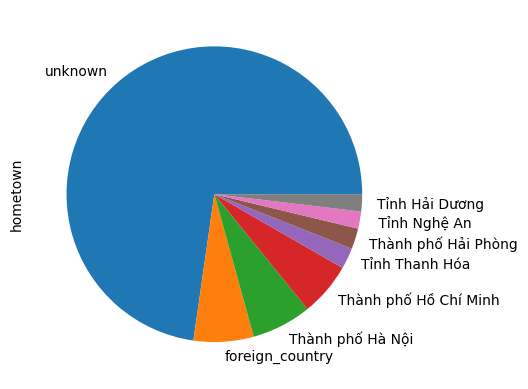

In [53]:
data_user['hometown'].value_counts().head(8).plot(kind='pie').set_ylabel("hometown")

$\rightarrow$ s·ªë l∆∞·ª£ng c√°c user h·ªçat ƒë·ªông trong page c√≥ ƒë·ªß c·∫£ 3 mi·ªÅn B·∫Øc Trung Nam , v√† c·∫£ h·∫£i ngo·∫°i

## Tr√¨nh ƒë·ªô h·ªçc v·∫•n c·ªßa user_comment

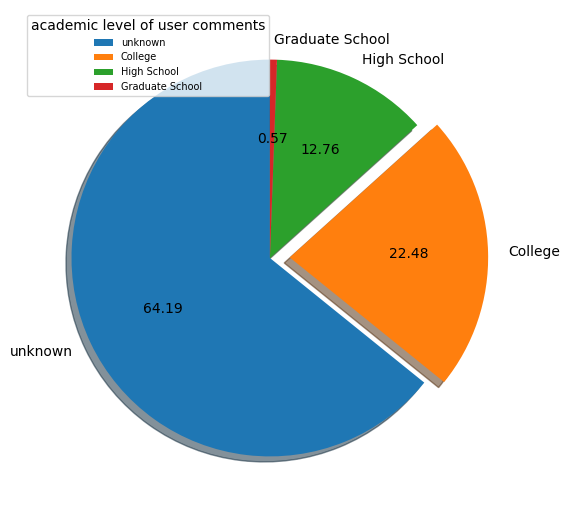

In [54]:
fig_ac, ax_ac = plt.subplots(1,1)
ax_ac.pie(data_user['education'].value_counts(),labels=data_user['education'].value_counts().index,shadow=True,startangle=90, explode=(0,0.1,0,0),autopct='%.2f')
ax_ac.legend(title = 'academic level of user comments',loc=2,prop={'size':7})
fig_ac.set_figheight(20)#checkpoint

$\rightarrow$ ph·∫ßn l·ªõn c√°c user ho·∫°t ƒë·ªông trong page m√† ƒë·ªÉ ph·∫ßn h·ªçc v·∫•n l√† public l√† cao ƒë·∫≥ng, ƒë·∫°i h·ªçc 

# K·∫øt Lu·∫≠n

- K·∫øt lu·∫≠n:
$\newline$ $\enspace$‚Ä¢	Page n√†y l√† 1 page ƒëƒÉng nh·ªØng b√†i vi·∫øt h√†i h∆∞·ªõc ƒë·ªÉ thu h√∫t ng∆∞·ªùi xem v√† t∆∞∆°ng t√°c
$\newline$ $\enspace$‚Ä¢	Page s·ª≠ d·ª•ng lo·∫°i video ng·∫Øn v·ªõi th·ªùi gian trung b√¨nh cho 1 video kho·∫£ng 40 gi√¢y gi·ªëng nh∆∞ c√°c video tr√™n tiktok nh·∫±m thu h√∫t ƒë∆∞·ª£c nhi·ªÅu user tr·∫ª, c√≥ ti·ªÅm nƒÉng mua h√†ng qu·∫£ng c√°o 
$\newline$ $\enspace$‚Ä¢	Page c√≥ s·ª≠ d·ª•ng buff t∆∞∆°ng t√°c v√† qu·∫£ng c√°o c·ªßa page ƒëang kh√¥ng nhi·ªÅu n√™n ƒë√¢y l√† 1 page ƒëang ph√°t tri·ªÉn, kh√¥ng mu·ªën spam qu·∫£ng c√°o nhi·ªÅu tr√°nh l√†m m·∫•t l∆∞·ª£ng user ho·∫°t ƒë·ªông trong page
$\newline$ $\enspace$‚Ä¢	ƒê·ªëi t∆∞·ª£ng m√† page nh·∫Øm ƒë·∫øn l√† kho·∫£ng tr√™n 16 tu·ªïi (t·ª´ tr·∫ª v·ªã th√†nh ni√™n tr·ªü l√™n), nh·ªØng ng∆∞·ªùi t·ª´ ƒë√£ c√≥ nh·∫≠n th·ª©c ƒë·∫øn ƒë√£ ƒë·ªß nh·∫≠n th·ª©c v·ªÅ x√£ h·ªôi
$\newline$ $\enspace$‚Ä¢	Hastag m√† page hay d√πng nhi·ªÅu nh·∫•t l√† #anhdaden , t√¨m ki·∫øm tr√™n facebook th·∫•y 1 page l√† Anh Da ƒêen v√† c√≥ 3.7 tri·ªáu l∆∞·ª£t theo d√µi https://www.facebook.com/anhdadenchuanmen th√¨ ƒë√¢y l√† 1 page c≈©ng c√≥ c√°c b√†i vi·∫øt c√≥ ki·ªÉu n·ªôi dung gi·ªëng v·ªõi page n√†y, 2 page c√≥ chung 1 email qu·∫£ng c√°o l√†  anhdadenqc@gmail.com n√™n ƒë√¢y l√† 2 page c·ªßa c√πng 1 admin , page Anh Da ƒêen th√¨ feed n√†o c≈©ng c√≥ 1 comment qu·∫£ng c√°o shopee ·ªü ƒë·∫ßu comments , v·∫≠y n√™n admin n√†y d√πng 1 page ƒë·ªÉ qu·∫£ng c√°o l√† page Anh Da ƒêen v√† 1 page Anh Da V√†ng ƒë·ªÉ buff l∆∞·ª£ng reactions, lu√¥n ƒë·ªÉ hastag l√† #anhdaden ƒë·ªÉ  thu h√∫t user truy c·∫≠p page Anh Da ƒêen ƒë·ªÉ qu·∫£ng c√°o tr√™n page Anh Da ƒêen
$\newline$ $\enspace$‚Ä¢	Hi·ªán t·∫°i th√¨ c√°c b√†i ƒëƒÉng c·ªßa page n√†y ƒë·ªß h√†i h∆∞·ªõc ƒë·ªÉ c√°c user v√†o gi·∫£i tr√≠ 
